## Часть 1. Описание набора данных и признаков. Цель исследования
#### Основной набор данных:

Этот набор данных содержит цены продажи жилья для округа Кинг, с административным центром в г. Сиэтл за период с мая 2014 года по май 2015 года.
Краткая информация из Википедии об округе Кинг (англ. King County)  
Крупные города: Сиэтл (окружной центр и самый большой город), Белвью, Такома
Население округа: 2 188 649 (на 2017 год)
Территория:	
 - Общая площадь	2,307 кв. миль (5,975 km2)
 - Площадь земель	2,116 кв. миль (5,480 km2)
 - Площадь водоемов	191 кв. миль (495 km2)
Сиэтл (англ. Seattle) — крупнейший город на северо-западе США и в штате Вашингтон, крупный морской порт. Расположен между системой заливов Пьюджет и озером Вашингтон.

#### Информация о наборе данных
Адресс нахождения данных: https://www.kaggle.com/harlfoxem/housesalesprediction/data

<b>id</b> - Номер обеъкта


<b>date</b> - Дата продажи объекта неджвижимости


<b>price</b>- Цена продажи


<b>bedrooms</b> - Кол-во спален


<b>bathrooms</b> - Кол-во ванных+сан.узлов


<b>sqft_living</b>- Жилая площадь дома


<b>sqft_lot</b> - Общая площадь участка


<b>'floors'</b> - Кол-во этажей в доме


<b>"waterfront"</b> - Вид на водоем (Да/Нет)


<b>view</b> - Был просмотрен (не очень понял что тут имелось ввиду)


<b>condition</b> - Насколько хорошо состояние (в целом)


<b>grade</b> - Общий класс(грейд), присвоенный обеъкту неджвижимости, основанный на системе классификации Кинг Кантри


<b>sqft_above</b> - Площадь объекта недвижимости, не включая подвал(если есть)


<b>sqft_basement</b> - Площадь подвала (если есть)

<b>yr_built</b> - Год постройки


<b>yr_renovated</b> - Год реновации (если была)


<b>zipcode</b> - Почтовый индекс


<b>lat</b> - Широта


<b>long</b> - Долгота


<b>sqft_living15</b> - Жилая площадь в 2015 году (подразумевает некоторые ремонтные работы/ перепланировку). Это может повлиять или не повлиять на общую площадь территории


<b>sqft_lot15</b> - Площадь общей территории в 2015 году(подразумевает некоторые ремонтные работы/ перепланировку)


#### Доплнительные данные взяты отсюда:

https://moto.data.socrata.com/dataset/King-County-Sheriff-s-Office/4h35-4mtu - Информация о преступлениях в округе Кинг

https://data.kingcounty.gov - Информационный портал округа Кинг(несколько разных отчетов по тематикам, Школы,Клиники,Магазины и общепит из которых я вытаскивал местонаходжение объектов и сами объекты)

Данные в агрегированном виде и основной датасет: https://cloud.mail.ru/public/DTDE/zax4jHwSL

#### Цель исследования: 
1. Исследовать данные по продажам недвижимости округа Кинг.

2. Построить модель наиболее точно предсказывающую стоимость объектов недвижимости на основании имеющихся данных и за счет сбора дополнительных.

#### Первичный план исследования:
1. Для ислледования и поиска лучшей модели я будут использовать на первом этапе регрессию Lasso и RandomForestRegressor с дефолтными или почти дефолтными настройками.
2. Метрики качества R2  и RMSLE - буду смотреть на обе, так удобнее. Первая характеризует некую абстрактную аккуратность, вторая превязана к реальным деньгам.
3. Запуск моделей буду проводить после каждого серьезного шага улучшений и добавлений новых признаков, чтобы следить за тем, что общий тренд исследования стремится к улучшению.
4. В конце попробую градиентный бустинг и далее блендинг и стеккинг.

## Часть 2. Первичный анализ данных
#### Импорт библиотек

In [69]:
# Импорт всех нужных библиотек
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import xgboost as xgb
import lightgbm as lgb

from scipy import stats
from scipy.special import inv_boxcox, boxcox1p
from scipy.stats.mstats import gmean
from scipy.stats import norm, skew , boxcox
from scipy.sparse import csr_matrix

pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

### Чтение данных

In [7]:
data = pd.read_csv('kc_house_data.csv', parse_dates  =['date'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


Данные не имеют пропусков, что уже хорошо.

In [9]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Сразу отложу данные для валидации исследования

In [10]:
ind = len(data)*0.8
work_data = data.ix[:ind]
validation_data = data.ix[ind:]
data.shape, work_data.shape, validation_data.shape

((21613, 21), (17291, 21), (4322, 21))

#### Зададим первичный Baseline, который будем потом улучшать
Перед анализом данных, поскольку сам дата сет без пропусков и ошибок, я построю простую модель RandomForest и использую его метрику качества score - по умолчанию R2 - коэф. детерминации, которую он считает на отложенной выборке. Дополнительно буду смотреть на среднеквадратичную логарифмическую ошибку (достаточно частая метрика в пердсказании стоимости недвижимости). Также посмотрю как они (R2 и RSMLE) зависимы друг от друга практически. RandomForest также выбираю из практических соображений, чтобы сразу посмотреть на значимость признаков

In [11]:
#Функция среднеквадратичной логарифмической ошибки
def rmsle(y_true,y_pred):
    assert len(y_true) == len(y_pred)
    return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

In [12]:
df_train = work_data.drop([ 'id','price', 'date'], axis=1)
target = work_data['price']
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)


clf = RandomForestRegressor(random_state=17)
clf.fit(X_train.values, y_train)

y_pred = clf.predict(X_test.values)
clf.score(X_test.values, y_test), rmsle(y_test, y_pred)

(0.8525042790971014, 0.19372548181351254)

In [13]:
#Сразу посмотрим какие признаки алгоритм оранжировал по степени важности
feature_importance = pd.DataFrame()
feature_importance['feature'] = df_train.columns
feature_importance['importances'] = clf.feature_importances_
feature_importance.sort_values('importances', ascending=False).head(20)

,feature,importances
8,grade,0.350461
2,sqft_living,0.232327
14,lat,0.153845
15,long,0.061892
16,sqft_living15,0.033874
11,yr_built,0.030161
9,sqft_above,0.024676
17,sqft_lot15,0.017934
5,waterfront,0.017356
6,view,0.017080


## Часть 3. Визуальный анализ данных

 Посмотрим на график зависимости цены от первых 5 самых важных признаков из базовго алгоритма, а также
 их зависимость между собой

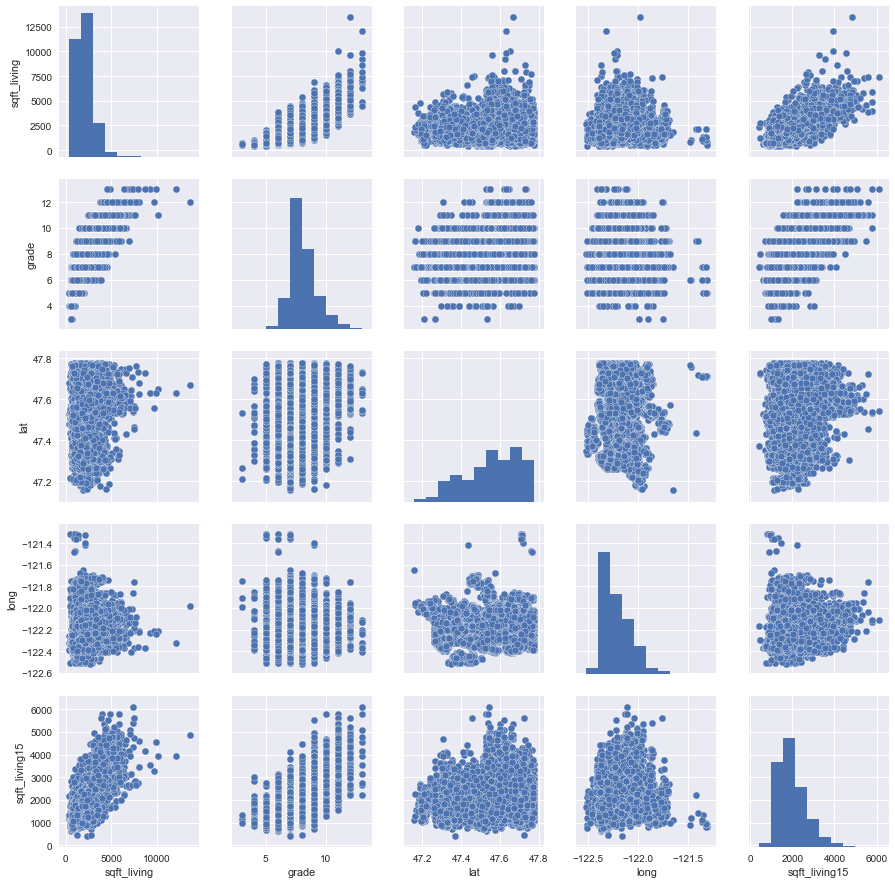

In [14]:
sns.set()
cols = feature_importance['feature'][feature_importance['importances']> 0.031]
sns.pairplot(work_data[cols], size = 2.5)
plt.show();

Из графиков видно, что на высокий грейд линейно влияет общая жилая площадь, а также немного жилая площадь по оценке на 2015 год (учитывающая реновации).

Text(0.5,1,'Распределение кол-ва проданных объектов относительно их районов, выделенных по zipcode')

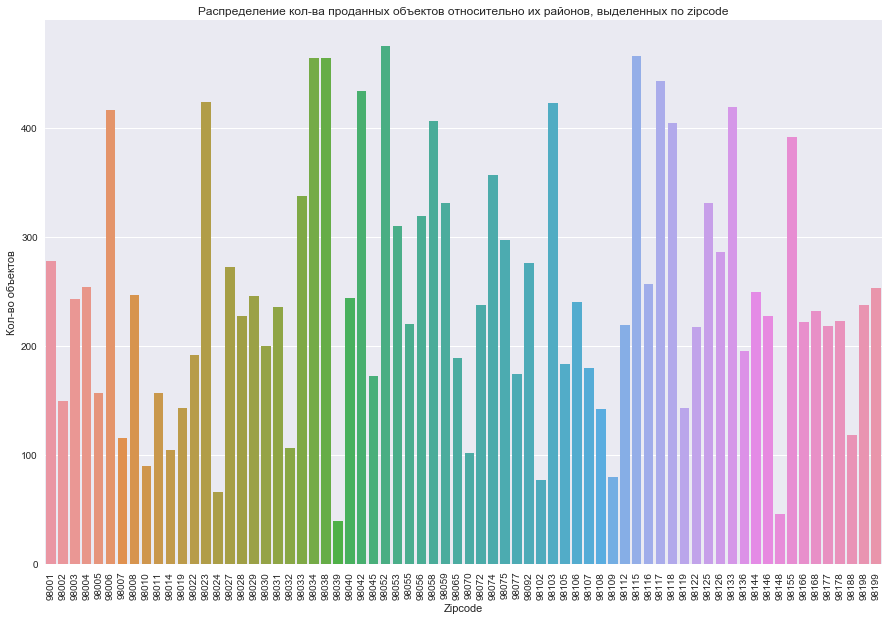

In [15]:
# Посмотрим как распределены продажи по zipcode

sort_data = work_data.groupby('zipcode', sort = 'id').count().reset_index()
plt.figure(figsize=(15,10))
ax= sns.barplot(x=sort_data['zipcode'], y=sort_data['bedrooms'])
plt.xticks(rotation= 90)
plt.xlabel('Zipcode')
plt.ylabel('Кол-во объектов')
plt.title("Распределение кол-ва проданных объектов относительно их районов, выделенных по zipcode")

В некоторых районах недвижимости продается в разы больше чем в других. Невысокиие продажи могут говорить как правило о двух противоположных тенеденциях. Дорогой район и там состав жильцов не меняется. Бедный район и там мало кто покупает. Посмотрим на других срезах, подтвердится ли гипотеза.

Text(0.5,1,'Распределение средней стоимости проданных объектов относительно их районов, выделенных по zipcode')

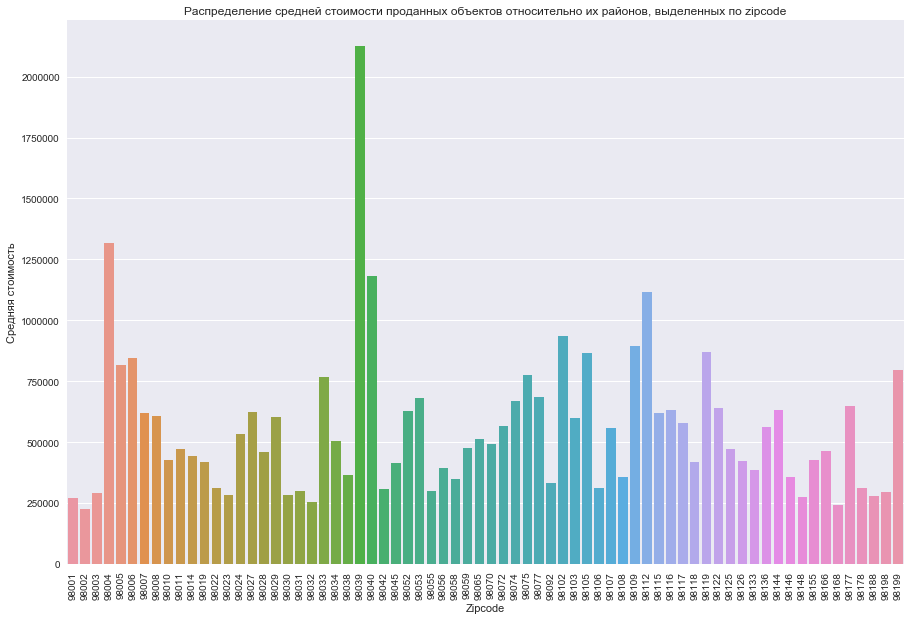

In [16]:
# Посмотрим как распределена средняя стоимость проданных объектов относительно их районов, выделенных по zipcode

sort_data_pz = work_data.groupby('zipcode', sort = 'id').mean().reset_index()
plt.figure(figsize=(15,10))
ax= sns.barplot(x=sort_data_pz['zipcode'], y=sort_data_pz['price'])
plt.xticks(rotation= 90)
plt.xlabel('Zipcode')
plt.ylabel('Средняя стоимость')
plt.title("Распределение средней стоимости проданных объектов относительно их районов, выделенных по zipcode")

#### Предположение:
Видно что есть несколько индексов(4), среденяя стоимость жилья возле которых превышает 1 млн. долларов. По всей видимости это какие-то элитные районы. Можно создать дополнительно 3 признака класса жилья по стоимости. 
Частичное подтверждение гипотезы по индексу 98039 - продается мало объектом и средняя стоимостьсвыше 2млн. долларов. - богатый район.

98039 - Медина, Вашингтон, США - входит в топ 10 самых дорогих районов в США, ср. стоимость недвижимости (по данным из интернета за 2015 год) около 2 998 000 долларов, в нашем графике около 2 100 000, но у нас все что реально продалось, а аналитические журналы часто аппелируют средней заявленной стартовой ценой продавца.

Text(0.5,1,'Распределение средней стоимости относительно года постройки')

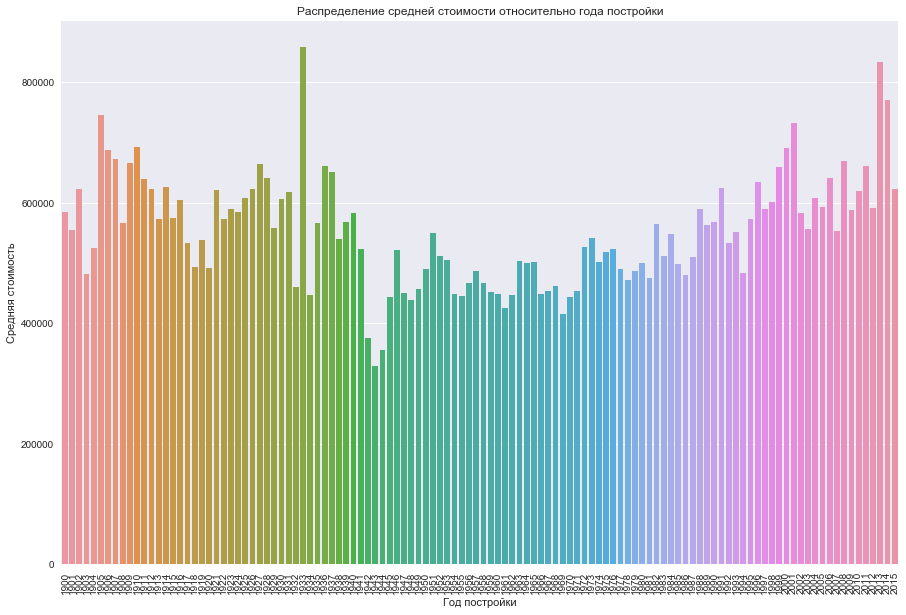

In [17]:
sort_data_yr = work_data.groupby('yr_built').mean().reset_index()
plt.figure(figsize=(15,10))
ax= sns.barplot(x=sort_data_yr['yr_built'], y=sort_data_yr['price'])
plt.xticks(rotation= 90)
plt.xlabel('Год постройки')
plt.ylabel('Средняя стоимость')
plt.title("Распределение средней стоимости относительно года постройки")


Интересно, что на графике видно, что средняя стоимость постоек до 1941 года и после 1994 выше, чем в период между этими датами. Это может свидетельствовать о таких факторах, как:
- Старые исторические здания в популярных районах (возможно исторические центры) ценятся выше.
- Новые постройки обычно строятся в экономически интересных для потребителей районах, а как следствиее спрос диктует цену
    
Т.е. возможно, постройки до 41 и после 94 - это строительство примерно в одних и тех же районах.
Нужно построить график распределения по годам построек по индексам.

Text(0.5,1,'Распределение возраста объектов недвижимости в засисимости от индекса')

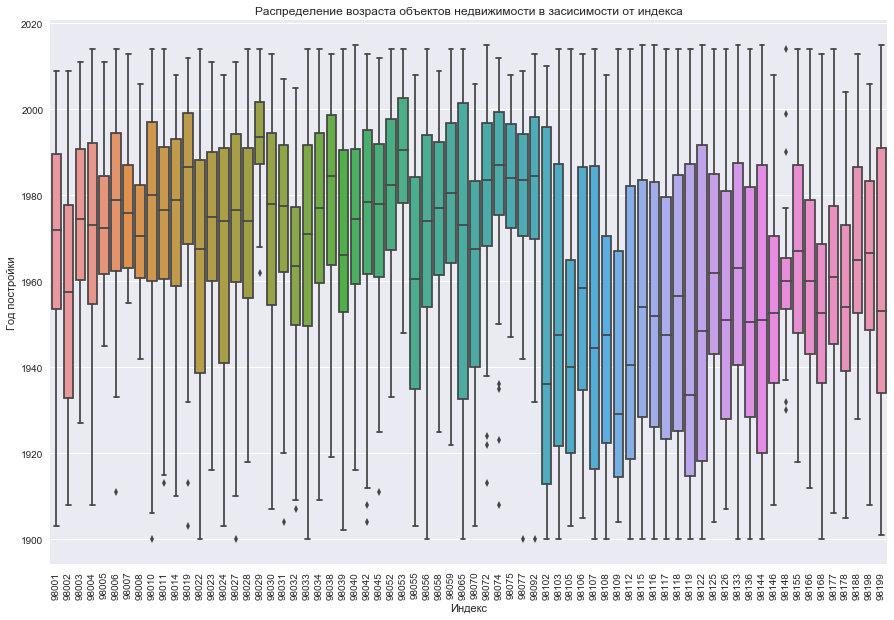

In [68]:
plt.figure(figsize=(15,10))
sort_data_zy = work_data.groupby(['zipcode','yr_built']).count().reset_index()
sns.boxplot(x="zipcode", y="yr_built", data=sort_data_zy)
plt.xticks(rotation= 90)
plt.xlabel('Индекс')
plt.ylabel('Год постройки')
plt.title("Распределение возраста объектов недвижимости в засисимости от индекса")

#### Предположение
Очевидно, что есть более "молодые районы" и более "старинные", также можно предположить, что индексы с "широким ящиком" это районы близкие к историческому центру городов или они и являются центрами, также из теории урбанизации можно сделать вывод что такие районы ближе к воде (к историческому порту), если город находится у судоходного водоема.

Проверил индекс 98102 - это почти центр г. Сиэтл и близкий к воде - т.е. предположение подтвердилось

Text(0.5,1,'График кол-ва продаж по месяцам')

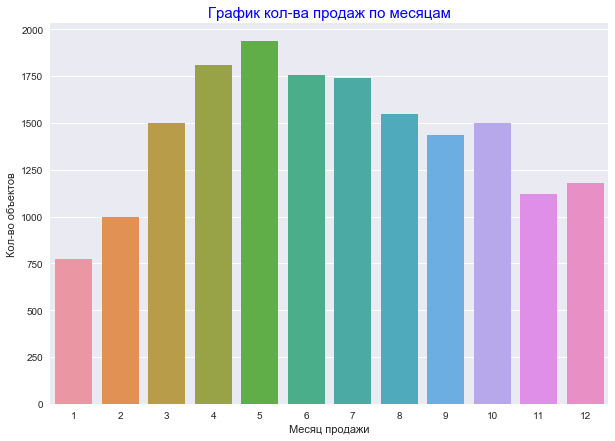

In [18]:
#Выделим из даты месяц продажи и посмотрим на распределение продаж по месяцам
work_data['month_sold'] = work_data['date'].apply(lambda ts: ts.month)
validation_data['month_sold'] = validation_data['date'].apply(lambda ts: ts.month)

plt.figure(figsize=(10,7))
sns.countplot(x=work_data.month_sold)
plt.xlabel('Месяц продажи')
plt.ylabel('Кол-во объектов')
plt.title('График кол-ва продаж по месяцам',color = 'blue',fontsize=15)

Видна определенная сезоннасть весной продают больше, чем зимой и т.д.

Text(0.5,1,'График распределения грейда среди всех проданных объектов')

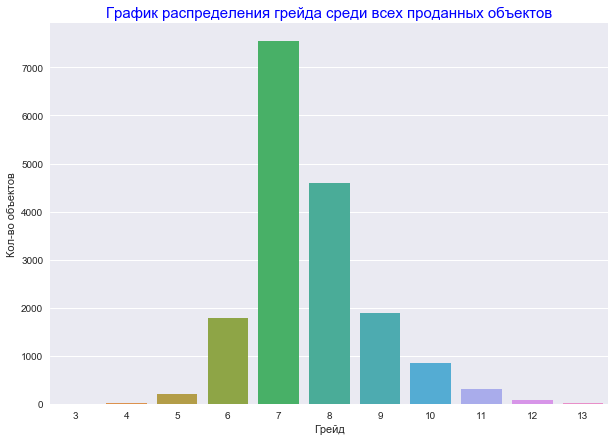

In [19]:
# Посмотрим на расперделение по грейду
plt.figure(figsize=(10,7))
sns.countplot(x=work_data.grade)
plt.xlabel('Грейд')
plt.ylabel('Кол-во объектов')
plt.title('График распределения грейда среди всех проданных объектов',color = 'blue',fontsize=15)

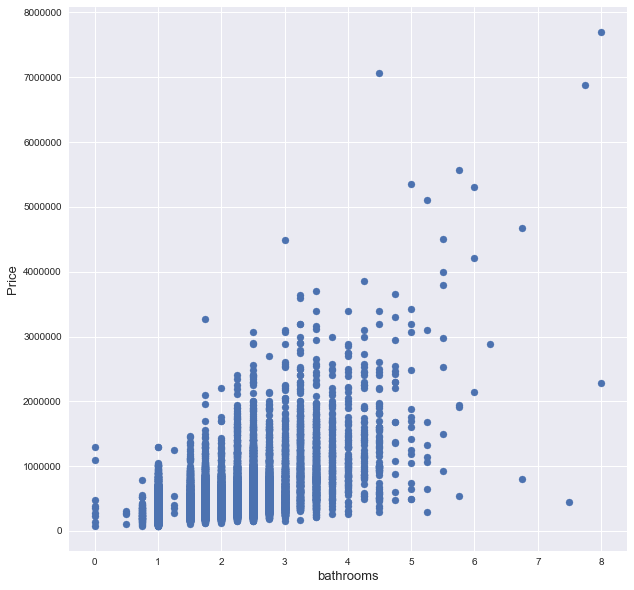

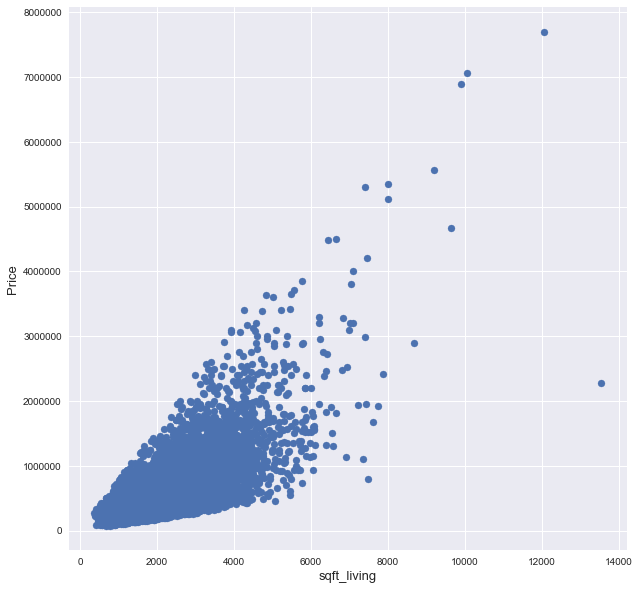

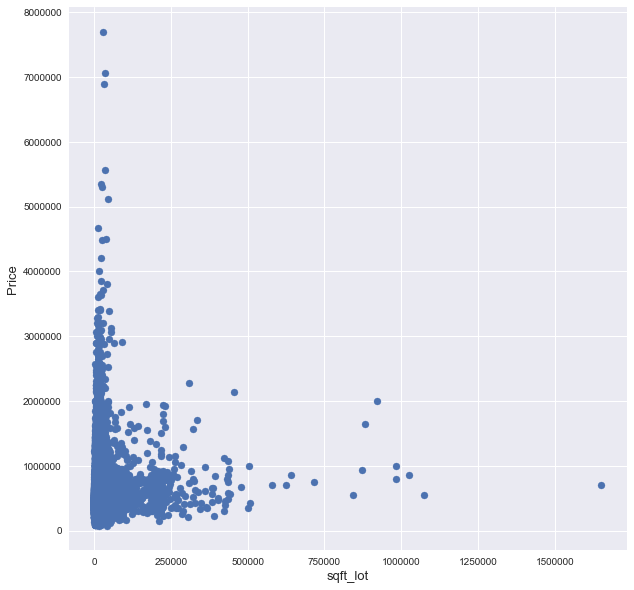

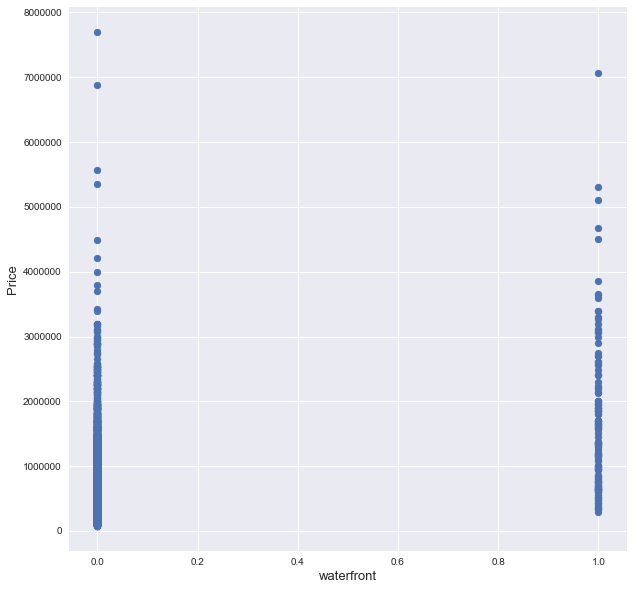

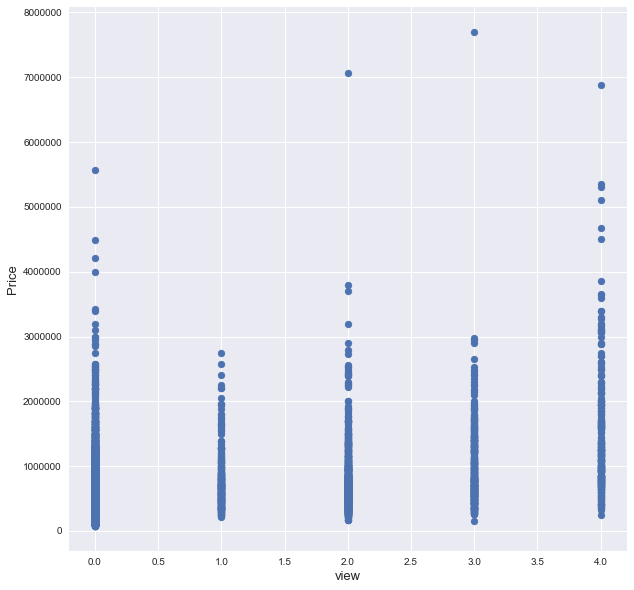

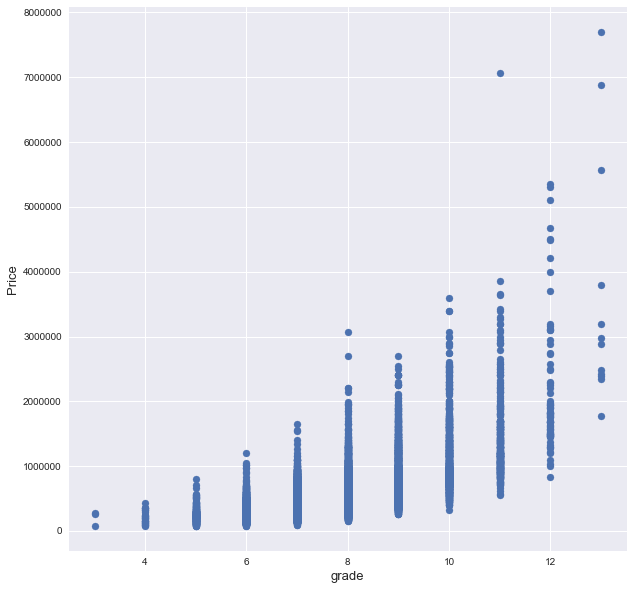

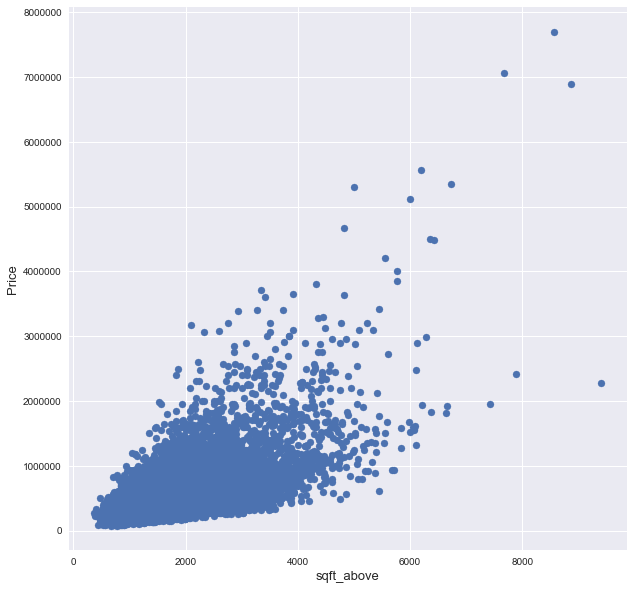

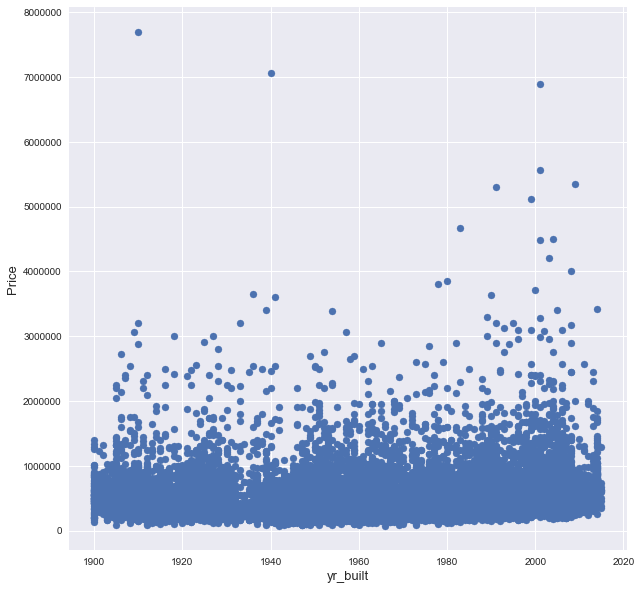

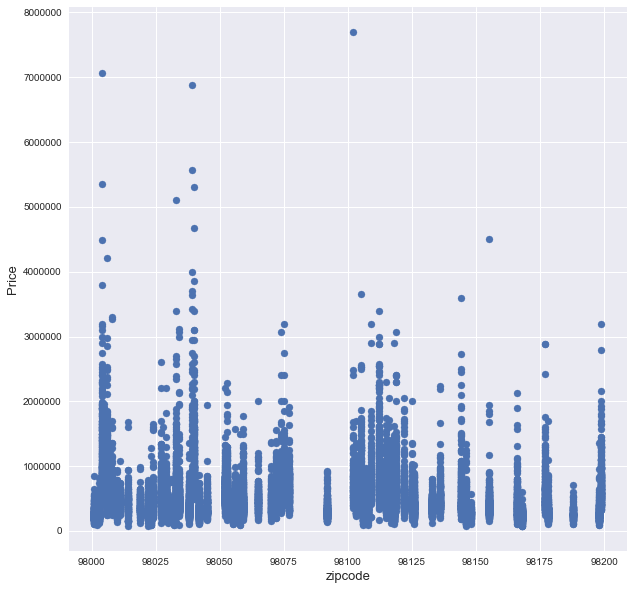

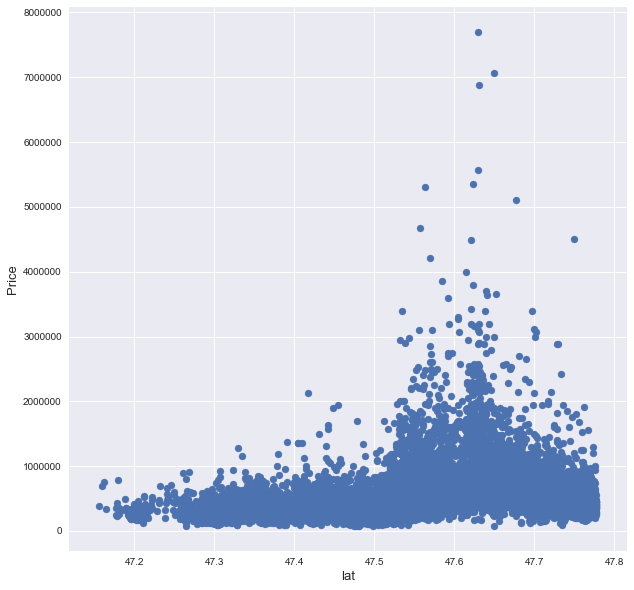

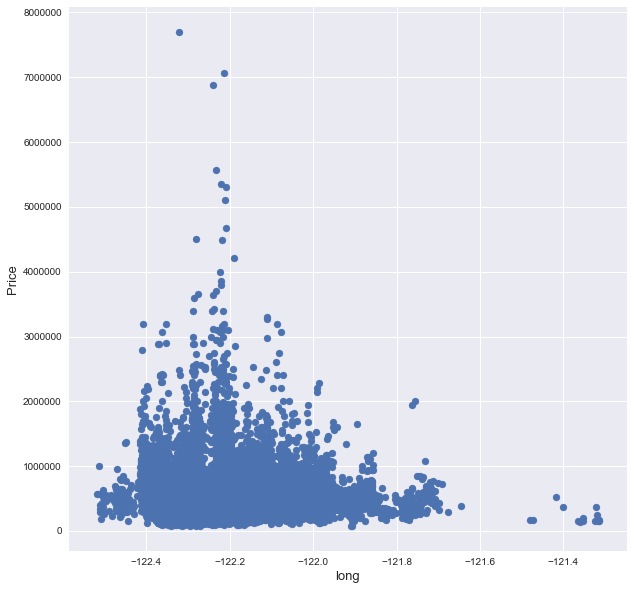

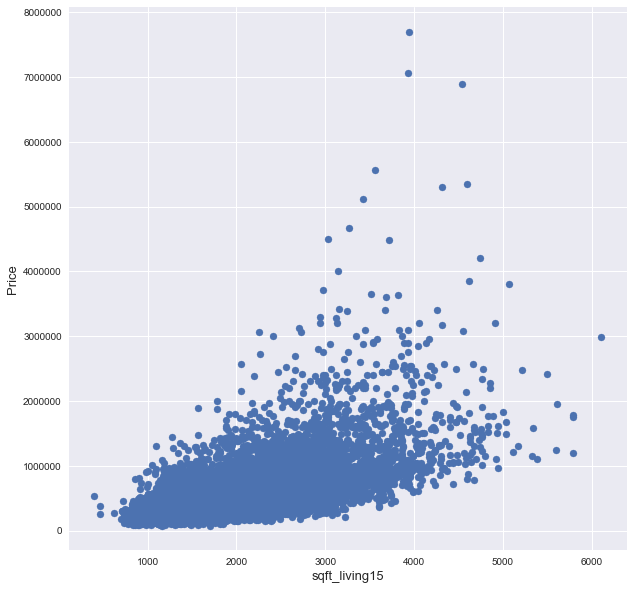

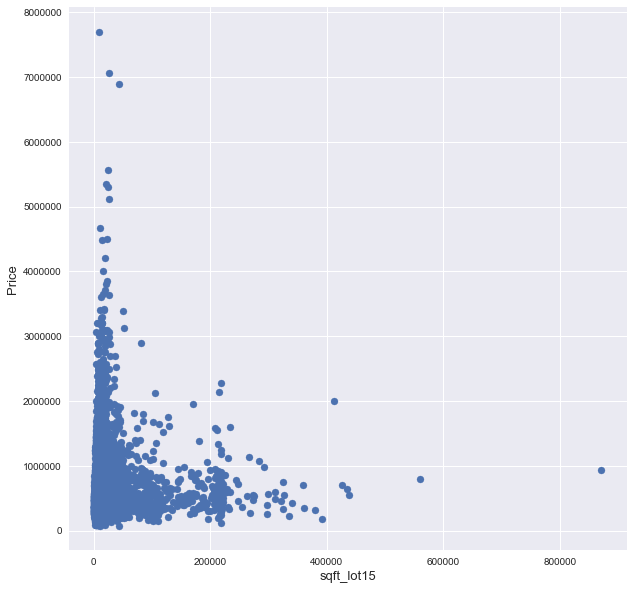

In [20]:
# Построим график зависимости цены на недвижимость в зависимости от самых значимых признаков (значимость больше 0.01)

for i in feature_importance['feature'][feature_importance['importances']> 0.01]:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x = work_data[i], y = work_data['price'])
    plt.ylabel('Price', fontsize=13)
    plt.xlabel(i, fontsize=13)
    plt.show()




Из полезного на графике №2 наблюдается 1 выброс, который стоит удалить, дабы он не повлиял на модели, чувствительные к выбросам, если мы в итоге такие будем использовать

По графикам зависимости от широты и долготы видно, что в дата сете присуствует порядка 10 объектов, у которых местоположение сильно влисяет на стоимость, возможно это условная Luxury недвижимость в элитных районах, где продается не так много объектов ежегодно.

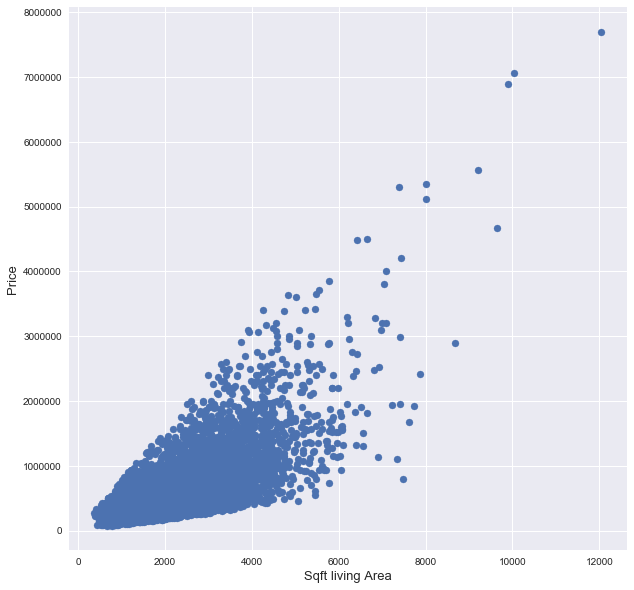

In [21]:
# Удалим выброс и построим график для проверки снова
work_data = work_data[work_data['sqft_living'] < 13000]
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = work_data['sqft_living'], y = work_data['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Sqft living Area', fontsize=13)
plt.show()

##### Полученные наблюдения распределений буду использовать для создания новых пороговых признаков

In [22]:
#Посмотрим на количество уникальных значений признаков
for col in work_data.select_dtypes(exclude=['datetime64']).columns:
    print([col], len(work_data[col].unique()))


['id'] 17136
['price'] 3360
['bedrooms'] 13
['bathrooms'] 29
['sqft_living'] 794
['sqft_lot'] 8296
['floors'] 6
['waterfront'] 2
['view'] 5
['condition'] 5
['grade'] 11
['sqft_above'] 718
['sqft_basement'] 271
['yr_built'] 116
['yr_renovated'] 70
['zipcode'] 70
['lat'] 4882
['long'] 737
['sqft_living15'] 627
['sqft_lot15'] 7469
['month_sold'] 12


Из интересного здесь.

Категориальные признаки:
 - zipcode , floors, yr_built, yr_renovated, bedrooms, bathrooms, waterfront
 
Ранговые:
 - grade, condition
 
эту информацию можно будет использовать для генерации новых признаков

#### Построим стандартную корреляционную матрицу для наглядности по всем числовым признакам

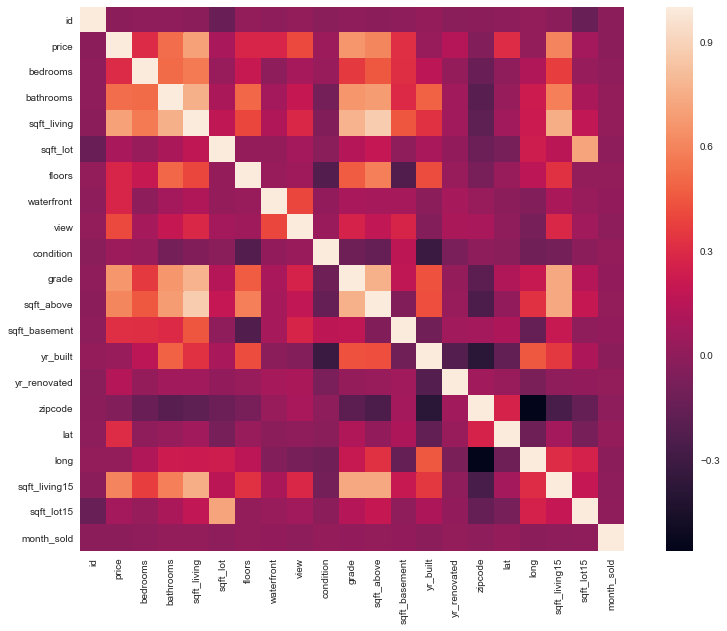

In [23]:
corrmat = work_data.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, square=True);

Из интересного здесь можно увидеть несколько интересных корреляционных групп.
    
Достаточно сильная корреляция между собой и ценой у:
    
    - bedroom, bathroom, sqft_living
    
    - waterfront, view
    
    - grade, sqft_above

### Теперь посмотрим что из себя вообще представляет ценнобразование - наша целевая метрика, с точки зрения распределения


 mu = 540088.14 and sigma = 367118.70



Text(0.5,1,'Распределение цены')

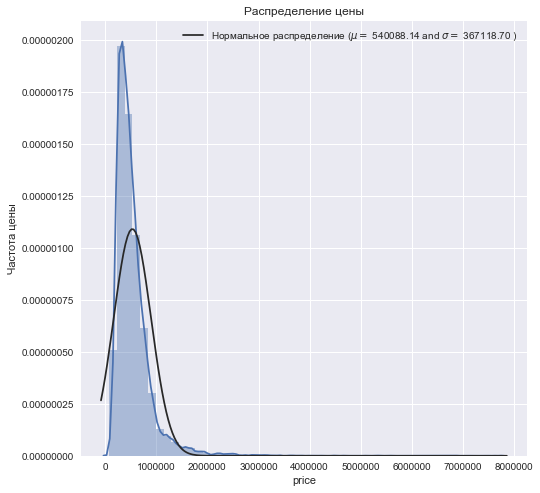

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

sns.distplot(work_data['price'] , fit=norm);
(mu, sigma) = norm.fit(data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Построим график распределения
plt.legend(['Нормальное распределение ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Частота цены')
plt.title('Распределение цены')



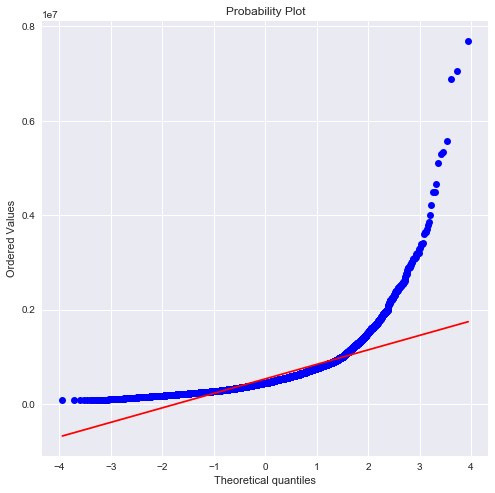

In [25]:
#Дополнительно построим QQ-plot
fig = plt.figure(figsize=(8, 8))
res = stats.probplot(work_data['price'], plot=plt)
plt.show()

На 1-ом графике видно, что распределение цены имеет правый уклон, что на самомм деле достаточно типично, по моему опытуЭ для рынка недвижимости США. По крайней мере 5-6 датасетов, что мне встречались имели похожий тренд.

Уже из этих грфиков, в принципе можно предположить,что линейные модели, которые заточены под нормальное распределение, будут иметь, скорее всего не очень высокий результат без преобразования данных.

##### Проверим гипотезу

In [26]:
df_train = work_data.drop([ 'id','price', 'date'], axis=1)
target = work_data['price']
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)
scalar = StandardScaler()
clf = Lasso(random_state=17)
lasso_base = Pipeline([('scalar', scalar), ('Lasso', clf)])
lasso_base.set_params(Lasso__alpha=1).fit(X_train, y_train)
                     
y_pred = lasso_base.predict(X_test)
print(" R2_score: {}, RMSLE: {}".format(lasso_base.score(X_test, y_test),rmsle(y_test, y_pred)))

 R2_score: 0.7117733939439578, RMSLE: 0.3811847272275312


Унылость результата подтверждает гипотезу. 

#### Посчитаем значение лямбда для price, чтобы преобразовать значение признака и построим график снова

In [27]:
sk_date = work_data['price'] - min(work_data['price']) + 1e-5
_, lmbda_price  = boxcox(sk_date)
target = boxcox1p(work_data['price'],  lmbda_price)
#Также проведем туже операцию для данных на валидации
target_val = boxcox1p(validation_data['price'],  lmbda_price)
print (lmbda_price)

0.1122046456671641



 mu = 533137.60 and sigma = 365685.98



Text(0.5,1,'Распределение цены')

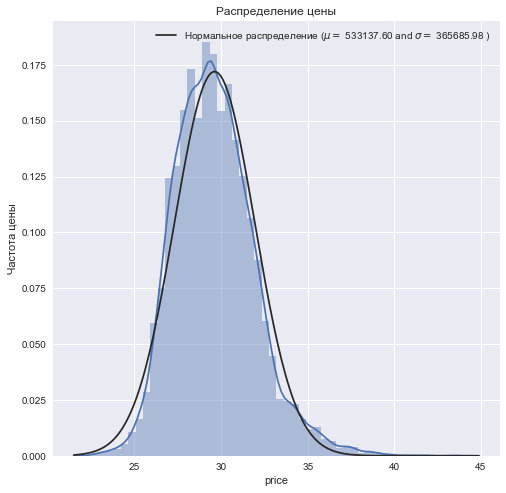

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.distplot(target , fit=norm);
(mu, sigma) = norm.fit(work_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Построим график распределения
plt.legend(['Нормальное распределение ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Частота цены')
plt.title('Распределение цены')

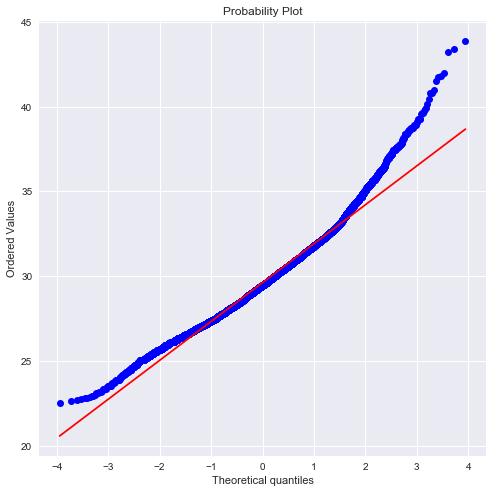

In [29]:
#Дополнительно построим QQ-plot
fig = plt.figure(figsize=(8, 8))
res = stats.probplot(target, plot=plt)
plt.show()

Почти прекрасно

#### На правах "Эксперимента" - любопытства ради

Text(0.5,1,'Распределение цены')

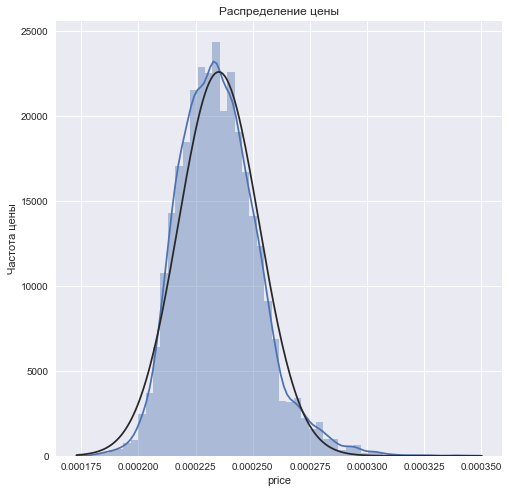

In [30]:
#Попробуем нормализавать распределение через геометрическое среднее
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
geom = (work_data['price']**0.104 - 1 )/ 0.104 * gmean(work_data['price'], axis=0)**(0.104 - 1)
sns.distplot(geom , fit=norm);

plt.ylabel('Частота цены')
plt.title('Распределение цены')

В данном случае, просто проверил формулу, которую видел в учебниках по статистике

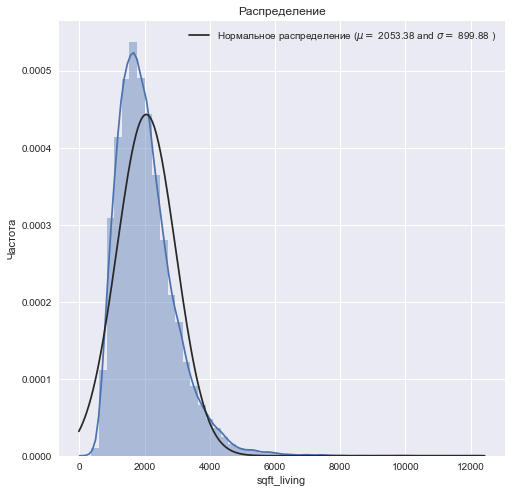

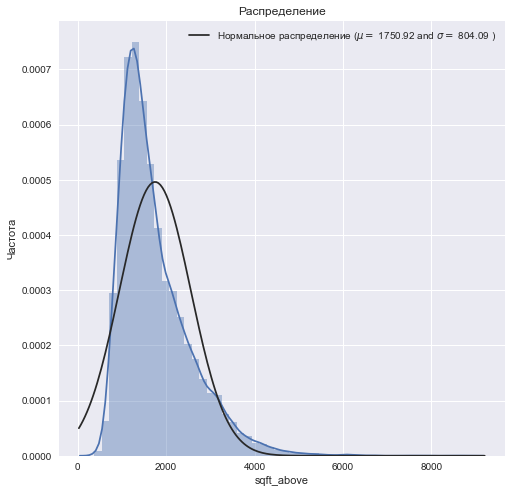

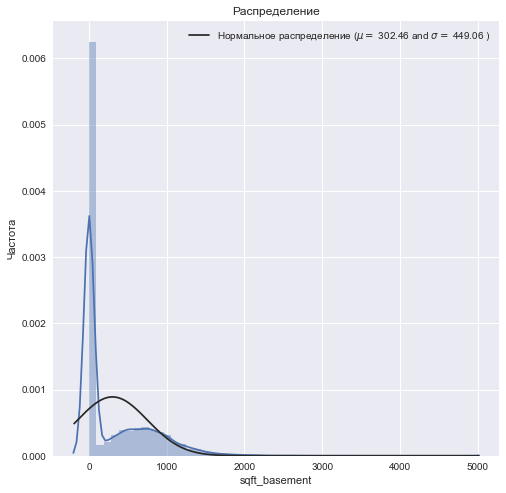

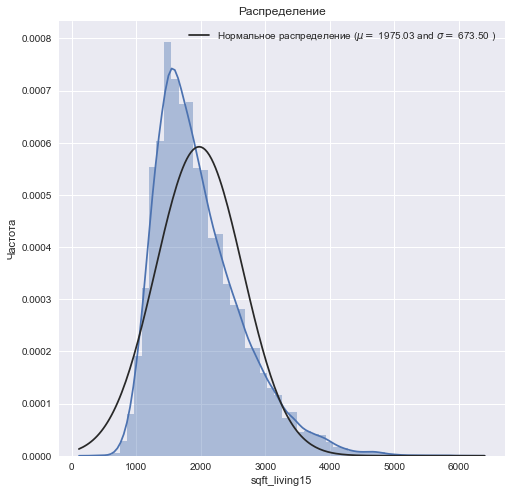

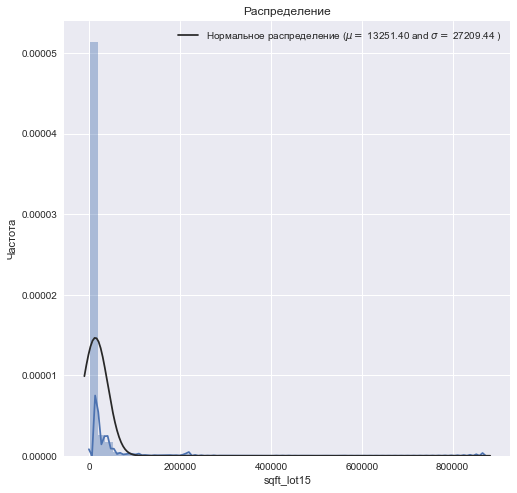

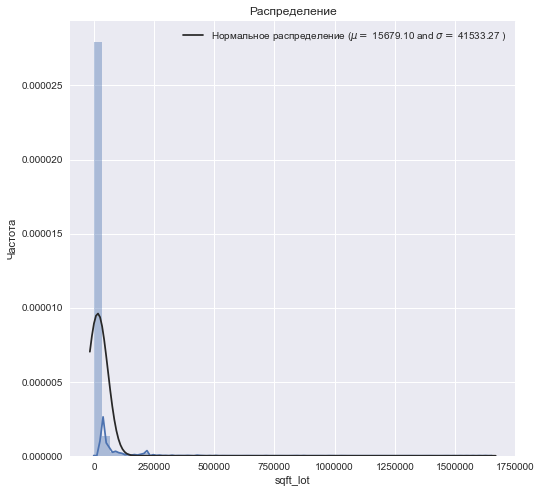

In [31]:
# Посмотрим на распределение других количественных признаков с широким диапазоном значений
columns_disc = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sqft_lot']
for col in columns_disc:
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    sns.distplot(work_data[col] , fit=norm);
    (mu, sigma) = norm.fit(work_data[col])
    

    #Построим график распределения
    plt.legend(['Нормальное распределение ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Частота')
    plt.title('Распределение')

Очевидно что все вышеуказанные колличественные признаки также как и цена имеют правый уклон.

_lot15, _lot, _basement - имеют много нулевых значений. Возможн стоит дополнительно добавить преобразованные дискретные признаки "Да/Нет" от них в набор данных

##  Часть 4. Преобразование исходных признаков.

In [32]:
skewed_feats = work_data[columns_disc].apply(lambda x: skew(x)).sort_values(ascending=False)
#col = list(data.drop(['date', 'id', 'zipcode','price', 'lat', 'long'], axis=1).columns)
#skewed_feats = data[col].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nУклон количественных признаков: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(6)


Уклон количественных признаков: 



,Skew
sqft_lot,13.197404
sqft_lot15,8.762571
sqft_above,1.512272
sqft_basement,1.509696
sqft_living,1.468533
sqft_living15,1.105666


Для нормально распределенных признаков значение skew должно быть равно 0 или быть близко к нему.

Для того, чтобы избежать во входных данных появления отрицательных или равных нулю значений, всегда будем находить минимальное значение входной последовательности и вычитать его из каждого ее элемента, дополнительно осуществляя сдвиг на небольшую величину, равную 1e-5.

In [33]:
#Вычислим оптимальное lambda для каждого
skewed_features = skewness.index
lambd = []
for feat in skewed_features:
    work_data[feat] = work_data[feat] - min(work_data[feat]) + 1e-5
    _, lmbda = boxcox(work_data[feat])
    lambd.append(lmbda)
    print(feat, lmbda)

sqft_lot -0.00720013792673554
sqft_lot15 0.003550060994879801
sqft_above 0.1546579620308789
sqft_basement -0.06914855117659569
sqft_living 0.27121535264474117
sqft_living15 0.19947443713004404


In [34]:
sum([abs(x) for x in lambd])/6

0.11754108365064586

##### Возьму итоговую общую лямбду =  0.12

In [35]:

lam = 0.12
for feat in skewed_features:
    work_data[feat] = work_data[feat] - min(work_data[feat]) + 1e-5
    work_data[feat] = boxcox1p(work_data[feat], lam)
    validation_data[feat] = validation_data[feat] - min(validation_data[feat]) + 1e-5
    validation_data[feat] = boxcox1p(validation_data[feat], lam)


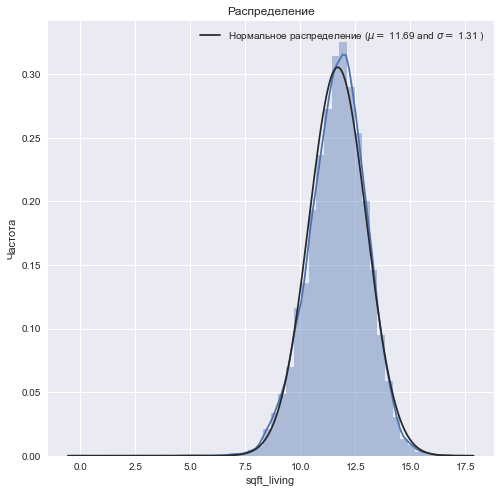

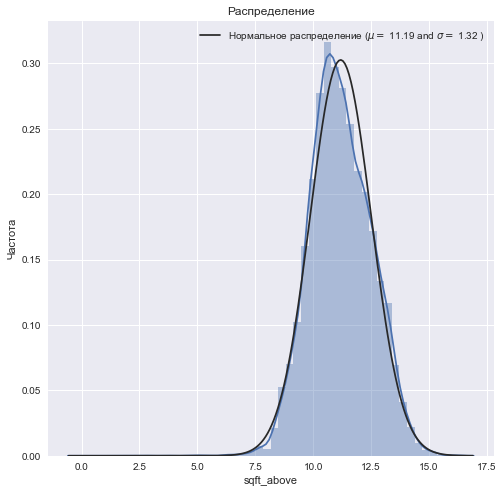

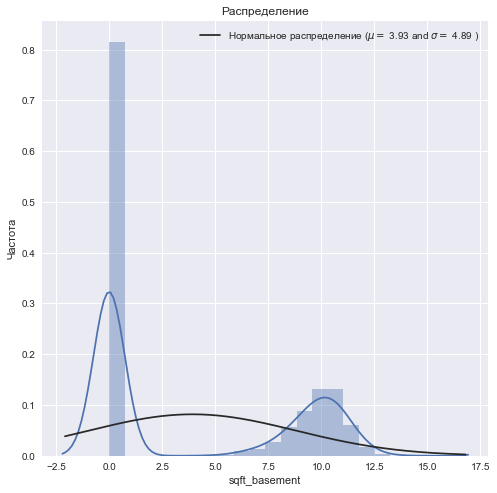

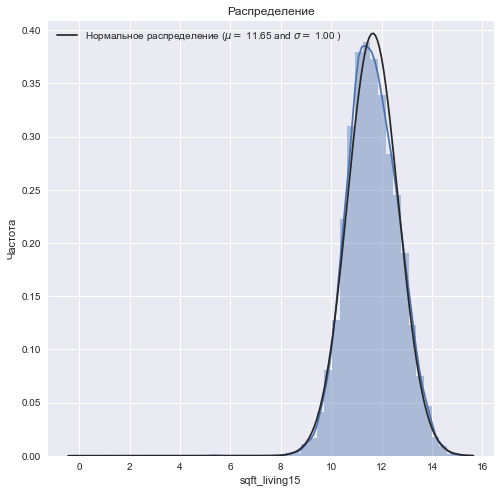

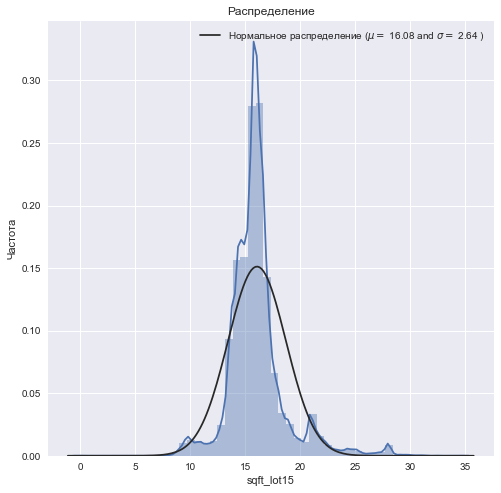

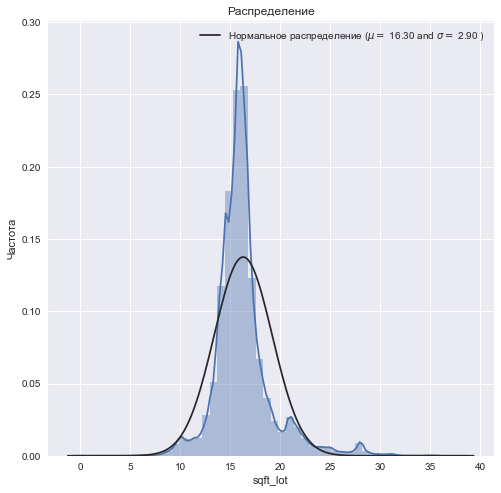

In [36]:
for col in columns_disc:
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    sns.distplot(work_data[col] , fit=norm);
    (mu, sigma) = norm.fit(work_data[col])
    

    #Построим график распределения
    plt.legend(['Нормальное распределение ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Частота')
    plt.title('Распределение')

Кроме площади цокольного этажа почти все признаки стали более нормально распределенными. 

#### Повторное контрольное обучение модели на испраленных признаках

In [37]:
df_train = work_data.drop(['id','price', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)


clf = RandomForestRegressor(random_state=17)
rnd_base = Pipeline([('scalar', scalar), ('rnd', clf)])
rnd_base.fit(X_train, y_train)
                     
y_pred = rnd_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(rnd_base.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.8749767673135365, RMSLE: 0.1884930110720317


Есть улучшение относительно исходных данных (0.8504728683309748, 0.19446848336861014) - улучшились оба показателя. 

Посмотрим что произошло с важностью признаков.

In [38]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = df_train.columns
feature_importance['importances'] = clf.feature_importances_
feature_importance.sort_values('importances', ascending=False).head(20)

,feature,importances
8,grade,0.347836
14,lat,0.285883
2,sqft_living,0.172065
15,long,0.046013
16,sqft_living15,0.025832
11,yr_built,0.019156
3,sqft_lot,0.017521
9,sqft_above,0.015482
17,sqft_lot15,0.014578
13,zipcode,0.011729


Интересно. Широта обогнала жилую площадь.

In [39]:
# Посмотрим как улучшилась регрессионная модель.
df_train = work_data.drop(['id','price', 'date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)
scalar = StandardScaler()
clf = Lasso(random_state=17)
lasso_base = Pipeline([('scalar', scalar), ('Lasso', clf)])
lasso_base.set_params(Lasso__alpha=1).fit(X_train.values, y_train)
                     
y_pred = lasso_base.predict(X_test.values)
print("R2_score: {}, RMSLE: {}".format(lasso_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))





R2_score: 0.32520491113427896, RMSLE: 0.43320833941364995


Показатели регрессионной модели ухудшились.

Было: R2_score: 0.711325562859866, RMSLE: 0.39307021980748347

Вообще это странно - такое ухудшение. Возможно, модель просто недообучается с таким высоким значением alpha

In [40]:
# Проверим коэффициенты
print("Коэффициенты: {}\n всего коэффициентов: {}\n всего коэффициентов отличныхот 0: {}".format(clf.coef_, len(clf.coef_),
                                                                                                 len(clf.coef_[clf.coef_ != 0])))

Коэффициенты: [ 0.          0.          0.15539634  0.          0.          0.
  0.          0.          0.51367757  0.          0.         -0.
  0.          0.          0.         -0.          0.          0.
 -0.        ]
 всего коэффициентов: 19
 всего коэффициентов отличныхот 0: 2


Что и следовало доказать, высокий коэффициент регуляризации занижает много весов, оставляя только 2

In [41]:
#Уменьшим регуляризацию
lasso_base = Pipeline([('scalar', scalar), ('Lasso', clf)])
lasso_base.set_params(Lasso__alpha=0.1).fit(X_train.values, y_train)
                     
y_pred = lasso_base.predict(X_test.values)
print("R2_score: {}, RMSLE: {}".format(lasso_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))
print("Коэффициенты: {}\n всего коэффициентов: {}\n всего коэффициентов отличныхот 0: {}".format(clf.coef_, len(clf.coef_),
                                                                                                 len(clf.coef_[clf.coef_ != 0])))

R2_score: 0.7647080543376268, RMSLE: 0.2563723678455825
Коэффициенты: [ 0.          0.15994031  0.48816392 -0.          0.00560584  0.10067956
  0.22324983  0.09359588  0.86819564  0.          0.         -0.33535708
  0.01298271 -0.          0.72644206 -0.          0.2840761  -0.
 -0.        ]
 всего коэффициентов: 19
 всего коэффициентов отличныхот 0: 11


In [ ]:
# Построим кривую кросс-валидации
cv_scores, holdout_scores = [], []
alphas = np.linspace(0.001, 1.0, 15)

for i in alphas:

    lasso = Lasso(alpha=i)
    cv_scores.append(np.mean(cross_val_score(lasso, X_train, y_train, cv=3)))
    lasso.fit(X_train, y_train)
    holdout_scores.append(r2_score(y_test, lasso.predict(X_test)))

plt.figure(figsize=(8, 8))
plt.plot(alphas, cv_scores, label='CV')
plt.plot(alphas, holdout_scores, label='holdout')
plt.title('Easy task. Lasso fails')
plt.legend();

Лучше оставить такой alpha = 0.1, так гораздо больше признаков работает.

## Часть 5. Создание новых признаков из начальных данных
Займемся поиском точек роста качества модели за счет инжиниринга признаков.
В части 3, где мы проводили визуальный анализ было обнаружено несколько интересныз закономерностей, которые мы инкрементируем в модель данных и посмотрим, как они повлияют на качество обучения.

In [42]:
# Добавим дополнительные дискретные признаки для колличественных, где большая часть имеет нулевые значения
work_data['_lot'] = 0
work_data['_lot15'] = 0
work_data['_basement'] = 0
work_data['_lot'][work_data['sqft_lot']>0] = 1
work_data['_lot15'][work_data['sqft_lot15']>0] = 1 
work_data['_basement'][work_data['sqft_basement']>0] = 1

# Выделю 3 группы объектов исходя из их стоимости
work_data['chip'] = 0
work_data['mid'] = 0 
work_data['exp'] = 0
work_data['chip'][work_data['price']<= 375000] = 1
work_data['mid'][(work_data['price']> 375000)&(work_data['price']<= 1000000)] = 1 
work_data['exp'][work_data['price']> 1000000] = 1

#Выделю сезоны продажи недвижимости
work_data['sum'] = 0
work_data['spr'] = 0
work_data['aut'] = 0
work_data['win'] = 0
work_data['sum'][(work_data['month_sold']>= 6) & (work_data['month_sold']<= 8)] = 1
work_data['spr'][(work_data['month_sold']>= 3) & (work_data['month_sold']<= 5)] = 1
work_data['aut'][(work_data['month_sold']>= 9) & (work_data['month_sold']<= 11)] = 1
work_data['win'][(work_data['month_sold']>= 1) & (work_data['month_sold']<= 2) | (work_data['month_sold']== 12)] = 1

# Выделю клас жилья через грейд
work_data['low'] = 0
work_data['average'] = 0 
work_data['high'] = 0
work_data['low'][work_data['grade']<= 5] = 1
work_data['average'][(work_data['price']> 5)&(work_data['price']<= 9)] = 1 
work_data['high'][work_data['price']> 9] = 1

#Выделю 3 группы исходя из года постройки
work_data['old'] = 0
work_data['old_to_hihg'] = 0 
work_data['young'] = 0
work_data['old'][work_data['yr_built']<= 1942] = 1
work_data['old_to_hihg'][(work_data['yr_built']> 1942)&(work_data['yr_built']<= 1994)] = 1 
work_data['young'][work_data['yr_built']> 1994] = 1

#Добавим 4 новых признака, 2 характеризующих  "возраст" дома, наличие подвала "Да\Нет", была ли реноваци "Да\нет"
work_data['years_old'] = 2015 - work_data['yr_built']
work_data['second_young'] = 2015 - work_data['yr_renovated']
work_data['second_young'][work_data['second_young'] == 2015] = 0
work_data['basement'] = 0
work_data['basement'][work_data['sqft_basement'] >0] = 1
work_data['was_renov'] = 0
work_data['was_renov'][work_data['yr_renovated'] >0] = 1
#Напишем простую функцию для лучшего разделения признаков, характеризующих размеры
def quadratic(feature):
    work_data[feature+'2'] = work_data[feature]**2
    
quadratic('sqft_living')
quadratic('sqft_living15')
quadratic('sqft_lot')
quadratic('sqft_above')
quadratic('sqft_basement')

# Проделю все тоже самое и для контрольной выборки
validation_data['_lot'] = 0
validation_data['_lot15'] = 0
validation_data['_basement'] = 0
validation_data['_lot'][validation_data['sqft_lot']>0] = 1
validation_data['_lot15'][validation_data['sqft_lot15']>0] = 1 
validation_data['_basement'][validation_data['sqft_basement']>0] = 1 

validation_data['chip'] = 0
validation_data['mid'] = 0 
validation_data['exp'] = 0
validation_data['chip'][validation_data['price']<= 375000] = 1
validation_data['mid'][(validation_data['price']> 375000)&(validation_data['price']<= 1000000)] = 1 
validation_data['exp'][validation_data['price']> 1000000] = 1

validation_data['sum'] = 0
validation_data['spr'] = 0
validation_data['aut'] = 0
validation_data['win'] = 0
validation_data['sum'][(validation_data['month_sold']>= 6) & (validation_data['month_sold']<= 8)] = 1
validation_data['spr'][(validation_data['month_sold']>= 3) & (validation_data['month_sold']<= 5)] = 1
validation_data['aut'][(validation_data['month_sold']>= 9) & (validation_data['month_sold']<= 11)] = 1
validation_data['win'][(validation_data['month_sold']>= 1) & \
                       (validation_data['month_sold']<= 2) | (validation_data['month_sold']== 12)] = 1

validation_data['low'] = 0
validation_data['average'] = 0 
validation_data['high'] = 0
validation_data['low'][validation_data['grade']<= 5] = 1
validation_data['average'][(validation_data['price']> 5)&(validation_data['price']<= 9)] = 1 
validation_data['high'][validation_data['price']> 9] = 1

validation_data['old'] = 0
validation_data['old_to_hihg'] = 0 
validation_data['young'] = 0
validation_data['old'][validation_data['yr_built']<= 1942] = 1
validation_data['old_to_hihg'][(validation_data['yr_built']> 1942)&(validation_data['yr_built']<= 1994)] = 1 
validation_data['young'][validation_data['yr_built']> 1994] = 1

# Тоже самое для валидации
validation_data['years_old'] = 2015 - validation_data['yr_built']
validation_data['second_young'] = 2015 - validation_data['yr_renovated']
validation_data['second_young'][validation_data['second_young'] == 2015] = 0
validation_data['basement'] = 0
validation_data['basement'][validation_data['sqft_basement'] >0] = 1
validation_data['was_renov'] = 0
validation_data['was_renov'][validation_data['yr_renovated'] >0] = 1

def quadratic(feature):
    validation_data[feature+'2'] = validation_data[feature]**2
    
quadratic('sqft_living')
quadratic('sqft_living15')
quadratic('sqft_lot')
quadratic('sqft_above')
quadratic('sqft_basement')
    

#### Сверим, не упустил ли какие признаки для валидации

In [43]:
work_data.shape, validation_data.shape

((17290, 47), (4322, 47))

#### Проверим прогресс

In [44]:
df_train = work_data.drop(['id','price', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)


clf = RandomForestRegressor(random_state=17)
rnd_base = Pipeline([('scalar', scalar), ('rnd', clf)])
rnd_base.fit(X_train, y_train)
                     
y_pred = rnd_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(rnd_base.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.9168017788852827, RMSLE: 0.1544276854871032


Есть неплохой прирост (R2_score: 0.8757049690628793, RMSLE: 0.18806603652440654)

In [45]:
clf = Lasso(random_state=17)
lasso_base = Pipeline([('scalar', scalar), ('Lasso', clf)])
lasso_base.set_params(Lasso__alpha=0.1).fit(X_train.values, y_train)
                     
y_pred = lasso_base.predict(X_test.values)
print("R2_score: {}, RMSLE: {}".format(lasso_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))


R2_score: 0.859201120304148, RMSLE: 0.1985696581535856


Регрессия тоже растет

## Часть 6. Создание новых признаков за счет загрузки доп. региональных данных*. 
*Данные были подготовлены отдельно через обработку сырых таблиц и отчетности.

Уровень преступности - агрегированан из отчета с сайта шерифа округа, где фиксируются все преступления по времени, по типу и месту

Школы - агрегирован, если правильно помню, из отчета по вакцинации учебных заведений округа (нач. школы и дет. сады).

Клиники - таблица с дислокацией мед. учереждений

Магазины, кафе, рестораны - агрегирован из отчета испекторов санитарных служб, которые занимаюца лецензированием таких заведений.

Сами данные брались из публичных источников и обрабатывались для выявления местонахождения объектов. Идея состоит в том, что близость к определенным объектам, наличие объектов для базовых потребностей(школа, больница, магазин), скопление объектов или событий(криминал) - все это влияет на конечную стоимость жилья.
Проверим...

In [46]:
# Уровень преступности 
crime = pd.read_csv('crimeKC.csv', index_col=0)
# Местоположения по индексу образовательных учереждений (нач. школа и дет. сады)
school = pd.read_csv('schoolKC.csv', index_col=0)
# Местоположения по индексу медицинских учереждений
clinic = pd.read_csv('clinicsKC.csv', index_col=0)
# Местоположения по индексу продуктовых магазинов, кафе, ресторанов
shop_horeca = pd.read_csv('shop_cafeKC.csv', index_col=0)

In [47]:
crime.head()

,zipcode,"ARSON, CONFIRMED","ASSAULT, AGGRAVATED","ASSAULT, CUTTING","ASSAULT, HANDGUN","ASSAULT, HANDGUN-DRIVEBY","ASSAULT, LONG GUN","ASSAULT, LONG GUN-DRIVEBY","ASSAULT, OTHER FIREARM","ASSAULT, OTHER FIREARM-DRIVEBY","ASSAULT, OTHER WEAPONS","ASSAULT, SIMPLE","ASSAULT, UNKNOWN FIREARM","ASSAULT, UNKNOWN FIREARM-DRIVEBY","BURGLARY, COMM., ATTEMPT","BURGLARY, COMM., F/E","BURGLARY, COMM., N/F","BURGLARY, RES., ATTEMPT","BURGLARY, RES., F/E","BURGLARY, RES., N/F",CHILD LURING (including attempted),COMPUTER HACKING,"CONTROLLED SUBSTANCE FOR DISPOSAL (I.E. NEEDLES, E",CONTROLLED SUBSTANCE VIOLATION,CREDIT CARD/ATM FRAUD,DISORDERLY CONDUCT,DRUNKENNESS,DUI,EMBEZZLEMENT,EXTORTION,FORGED PRESCRIPTIONS,"FORGERY (DOCUMENTS, COURT PAPERS, ETC)",FORGERY CHECKS,FORGERY CREDIT CARDS,"FRAUD, ALL OTHER","FRAUD, BAD CHECKS",IDENTITY THEFT,ILLEGAL DUMPING,IMPERSONATION,"LARCENY, APA","LARCENY, BIKE","LARCENY, COMD","LARCENY, D/D","LARCENY, NSC","LARCENY, P/P","LARCENY, P/S","LARCENY, S/L","LARCENY, TFA","LARCENY, TFB","LIQOUR VIOLATION, SOUNDER RELATED","LIQUOR VIOLATION, LR RELATED","LIQUOR VIOLATION, TRANSIT RELATED",LIQUOR/TOBACCO VIOLATIONS,MAIL THEFT,MARIJUANA (MISDEMEANOR),PHYSICAL CONTROL,PROSTITUTION,"PROSTITUTION, ASSISTING OR PROMOTING/PIMPING","PROSTITUTION, PURCHASING",RECKLESS DRIVING,"ROBBERY, BANK","ROBBERY, CARJACKING","ROBBERY, CHAIN STORE","ROBBERY, COMM. HOUSE","ROBBERY, GAS STATION","ROBBERY, HIGHWAY","ROBBERY, MISC","ROBBERY, RESIDENCE","STOLEN PROPERTY., POSSESSION AND / OR SALE",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS PERSON,SUSPICIOUS VEHICLE,"THEFT, AUTO","THEFT, BUS OR TRUCK","THEFT, OTHER VEHICLE",TRESPASS,VANDALISM OVER $1500,VANDALISM UNDER $1500,"VIOLATION OF COURT ORDERS, (FELONY)",WIRE FRAUD
0,10160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
school.head()

,zipcode,Academy Schools / Children’s Academy,Academy for Precision Learning,Aki Kurose Middle School,Amazing Grace Christian School,Applied Scholastics Academy of Seattle,Arbor Schools,Arrowhead Elementary,Assumption St. Bridget,Bear Creek Elementary,Beaver Lake Middle School,Bellevue Big Picture School,Bellevue Children's Academy 2nd Location,Bellevue Christian Mack Elementary,Beverly Park Elem at Glendale,Billings Middle School,Blossoming Hill Montessori,Bow Lake Elementary,Briarcrest Elementary,Bright Water School,Brightmont Academy--Bellevue Campus,Brightmont Academy--Sammamish Campus,Brightmont Academy--Seattle Campus,Broadview-Thomson K-8 School,Brock's Academy,Brooklake Christian School,Brookside Elementary,Brownstone Academy (American Academy),Buena Vista SDA School,Canyon Creek Elementary,Carriage Crest Elementary School,Cascade Independent High School,Cascade K-8 Community School (Room Nine),Cascade Middle School,Cascade Parent Partnership Program,Catharine Blaine K-8 School,Cedar Park Christian Schools,Cedar River Academy,Cedar River Middle School,Cedar River Montessori School,Cedar Valley Elementary School,Cedarhurst Elementary,Central Educational Services,Chestnut Hill Academy South Campus,Chief Kanim Middle School,Child School-New Heights School at Children's Institute for Learning Differences (CHILD),Chinook Middle School,Christ the King School,Christian Faith School,Chrysalis School (K-8),...,St. Louise School,St. Luke School,St. Madeleine Sophie School,St. Mark School,St. Matthew School,St. Monica School,St. Paul School,St. Philomena School,St. Therese School,St. Thomas School,St. Vincent De Paul School,Stella Schola,Summit Classical Christian School,Sunrise Elementary,Sunrise Elementary School,Tahoma Middle School,Technology Access Foundation Academy,The Bear Creek School,The Bush School,The Clearwater School,The Lake and Park School,The Little School,Three Cedars Waldorf School,Three Points Elementary,Three Tree Montessori,Thunder Mountain Middle School,Tillicum Middle School,Tolt Middle School,Tops K-8 School,Torah Day School of Seattle,Totem Middle School,Twin Falls Middle School,Two Rivers School,Tyee Middle School,University Preparatory,Valley Christian School,Villa Academy,Washington Middle School,Wellington Elementary,West Seattle Montessori School,Westhill Elementary,Westside School,White Center Heights Elementary,Whitman Middle School,Whole Earth Montessori School,Woodin Elementary,Woodinville Montessori School,Woodmont Elementary School,Woodmoor Elementary,Yellow Wood Academy
0,98101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,98001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.

In [49]:
clinic.head()

,zipcode,Auburn Public Health Center,Columbia Public Health Center,Downtown Public Health Center,Eastgate Public Health Center,Federal Way Public Health Center,Kent Public Health Center at Birch Creek,Kent Public Health Center at East Hill,North Public Health Center,Northshore Public Health Center,Renton Public Health Center,White Center Public Health Center,zip
0,98002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98002
1,98003,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,98003
2,98004,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,98004
3,98007,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98007
4,98011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,98011


In [50]:
shop_horeca.head()

,zipcode,#7064 ARCO AM/PM,1000 SPIRITS,108 AUTHENTIC VIETNAMESE CUISINE,112TH DELI,"116 TWO ZERO, LLC. / SALMON CREEK CAFE",11TH AVENUE INN,11TH FRAME RESTAURANT & LOUNGE,12 SCOOPS,120TH GROCERY & DELI,125TH ST GRILL,12TH AVE CAFE,12TH AVE CAFFE,13 COINS,14 CARROT CAFE,1ST LUTHERAN,2 SISTERS ESPRESSO,20 CORNERS BREWING CO.,20 OZ TEA,206 BURGER CO,206BURGERCOMPANY,21 ACRES MARKET,212TH CHEVRON,23RD & CHERRY FELLOWSHIP HALL,2C THAIBISTRO & SPIRITS,314 PIE,"3156, LLC",36 STONE,3RD AVE CAFE,4 GUYS MINI MART,4 POINTS SHERATON BISTRO KITCHEN,405 EXPRESS MINI MARKET,4649 RESTAURANT,4TH AVENUE CAFE,5 CORNERS MINI MART,5 GUYS SEATTLE BURGERS,5 HERMANOS,5-SPOT,505 DIMPLES GIFT & SUNDRIES,520 BAR & GRILL,56TH STREET MARKET,663 BISTRO,7 SANDWICH (KC410),7-ELEVEN #2360-18146E,7-ELEVEN #2361-20249D,7-ELEVEN #39639A,7-ELEVEN #19042G,7-ELEVEN #2303 - 27219B,7-ELEVEN #2360-27304B,7-ELEVEN #2361 - 39423A,...,YUMMY BANCHAN,YUMMY BITES,"YUMMY CAFE, LLC",YUMMY CREPE,YUMMY DUCK,YUMMY HOT POT,YUMMY HOUSE BAKERY,YUMMY PHO,YUMMY SPACE,YUMMY TERIYAKI,YUMMY TERYAKI,"YUMMYLICIOUS, LLC",YUSRA AND SABAH RESTAURANT,"Yard Cafe, The",Yogurtland,Z Food Mart,ZAINA FOOD,ZAKI MEDITERRANEAN GRILL,ZAMORANA,ZAP VERR THAI RESTAURANT & LOUNGE,ZAW,ZAW ARTISAN PIZZA,ZAZYNIA MEDITERRANEAN GRILL,ZEEKS PIZZA,ZEEKS PIZZA INC,ZEERINE SUBWAY #20520,ZEITGEIST ART & COFFEE,ZERBA CELLARS / Z WINES,ZEST FAST FOOD,ZETA PSI FRATERNITY,ZETA TAU ALPHA,ZHENG,ZHENG LLC (KC542),ZIG ZAG CAFE,ZIP MARKET,ZIP MARKET & DELI,ZIP MART,ZIPPY'S GIANT BURGERS,ZITI ITALIANO,ZITI PASTA ITALIANO,ZOBEL ETHIOPIAN RESTAURANT,ZOE EVENTS,ZOEYOGURT,ZOKA COFFEE ROASTER & TEA CO,ZOLAS COFFEE,ZOMBIE BURGERS,ZOUAVE RESTAURANT,ZULU BOARD GAMES CAFE,ZUSHI SUSHI,Zeeks Pizza
0,98001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,98003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,98005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Новые данные представляют из себя 4 разреженных матрицы, которые я сгенерировал из различных публичных государственных источников округа Кинг

### Часть 6.1 Начнем с уровня преступности
В данной таблице собраны суммарные происшествия за несколько лет по типам и по zipcode.  Несмотря на то что данные агрегированны за период больший периоду продаж недвижимости, они скорее отражают тренд, выделяя более "преступные" локации.

In [51]:
work_data = work_data.merge(crime, how='left', on='zipcode')
#Некоторые данные не будут иметь совпадений из таблицы crime
work_data = work_data.fillna(0)

In [52]:
work_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,_lot,_lot15,_basement,chip,mid,exp,sum,spr,aut,win,low,average,high,old,old_to_hihg,young,years_old,second_young,basement,was_renov,sqft_living2,sqft_living152,sqft_lot2,sqft_above2,sqft_basement2,"ARSON, CONFIRMED","ASSAULT, AGGRAVATED","ASSAULT, CUTTING",...,FORGED PRESCRIPTIONS,"FORGERY (DOCUMENTS, COURT PAPERS, ETC)",FORGERY CHECKS,FORGERY CREDIT CARDS,"FRAUD, ALL OTHER","FRAUD, BAD CHECKS",IDENTITY THEFT,ILLEGAL DUMPING,IMPERSONATION,"LARCENY, APA","LARCENY, BIKE","LARCENY, COMD","LARCENY, D/D","LARCENY, NSC","LARCENY, P/P","LARCENY, P/S","LARCENY, S/L","LARCENY, TFA","LARCENY, TFB","LIQOUR VIOLATION, SOUNDER RELATED","LIQUOR VIOLATION, LR RELATED","LIQUOR VIOLATION, TRANSIT RELATED",LIQUOR/TOBACCO VIOLATIONS,MAIL THEFT,MARIJUANA (MISDEMEANOR),PHYSICAL CONTROL,PROSTITUTION,"PROSTITUTION, ASSISTING OR PROMOTING/PIMPING","PROSTITUTION, PURCHASING",RECKLESS DRIVING,"ROBBERY, BANK","ROBBERY, CARJACKING","ROBBERY, CHAIN STORE","ROBBERY, COMM. HOUSE","ROBBERY, GAS STATION","ROBBERY, HIGHWAY","ROBBERY, MISC","ROBBERY, RESIDENCE","STOLEN PROPERTY., POSSESSION AND / OR SALE",SUSPICIOUS CIRCUMSTANCES,SUSPICIOUS PERSON,SUSPICIOUS VEHICLE,"THEFT, AUTO","THEFT, BUS OR TRUCK","THEFT, OTHER VEHICLE",TRESPASS,VANDALISM OVER $1500,VANDALISM UNDER $1500,"VIOLATION OF COURT ORDERS, (FELONY)",WIRE FRAUD
0,7129300520,2014-10-13,221900.0,3,1.00,10.283305,14.896334,1.0,0,0,3,7,10.283305,0.000010,1955,0,98178,47.5112,-122.257,10.620841,14.819346,10,1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,60,0,1,0,105.746358,112.802256,221.900775,105.746358,9.999912e-11,3.0,26.0,6.0,...,0.0,4.0,8.0,2.0,23.0,2.0,27.0,9.0,1.0,5.0,2.0,1.0,0.0,64.0,2.0,5.0,9.0,103.0,35.0,0.0,0.0,0.0,0.0,117.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,16.0,10.0,2.0,8.0,61.0,5.0,15.0,211.0,0.0,2.0,109.0,12.0,122.0,10.0,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,12.652835,15.661975,2.0,0,0,3,7,12.153763,8.774542,1951,1991,98125,47.7210,-122.319,11.353246,15.770239,12,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,64,24,1,1,160.094242,128.896189,245.297448,147.713944,7.699259e+01,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0
2,5631500400,2015-02-25,180000.0,2,1.00,8.774542,16.672495,1.0,0,0,3,6,8.774542,0.000010,1933,0,98028,47.7379,-122.233,12.788043,15.941021,2,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,82,0,1,0,76.992589,163.534050,277.972101,76.992589,9.999912e-11,0.0,5.0,3.0,...,0.0,1.0,2.0,0.0,11.0,0.0,21.0,1.0,1.0,6.0,9.0,0.0,0.0,21.0,0.0,0.0,23.0,51.0,26.0,0.0,0.0,0.0,0.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,60.0,2.0,2.0,27.0,0.0,6.0,78.0,2.0,48.0,3.0,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,11.851222,14.521799,1.0,0,0,5,7,9.897075,10.544883,1965,0,98136,47.5208,-122.393,10.668686,14.434910,12,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,50,0,1,0,140.451451,113.820868,210.882657,97.952103,1.111946e+02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,11.387764,16.002614,1.0,0,0,3,8,11.387764,0.000010,1987,0,98074,47.6168,-122.045,11.547222,15.713393,2,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,28,0,1,0,129.681170,133.338341,256.083665,129.681170,9.999912e-11,1.0,2.0,0.0,...,0.0,0.0,2.0,0.0,15.0,2.0,49.0,1.0,1.0,0.0,4.0,0.0,0.0,17.0,1.0,2.0,3.0,83.0,10.0,0.0,0.0,0.0,6.0,40.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,2.0,0.0,13.0,0.0,2.0,18.0,6.0,27.0,1.0,1.0


In [53]:
%%time
# Проверим регрессию
df_train = work_data.drop(['id', 'price', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)

scalar = StandardScaler()
clf = Lasso(random_state=17)
lasso_base = Pipeline([('scalar', scalar), ('Lasso', clf)])
lasso_base.set_params(Lasso__alpha=0.1).fit(X_train, y_train)
                     
y_pred = lasso_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(lasso_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))






R2_score: 0.8659370462050093, RMSLE: 0.19393843936716876
Wall time: 269 ms


Напомню до этого результат был: R2_score: 0.859201120304148, RMSLE: 0.1985696581535856 - т.е. новые данные улучшили модель.

In [54]:
%%time
# Сравним с RandomForest

clf = RandomForestRegressor(random_state=17)
rnd_base = Pipeline([('scalar', scalar), ('rnd', clf)])
rnd_base.fit(X_train, y_train)
                     
y_pred = rnd_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(rnd_base.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.9166856044252167, RMSLE: 0.15488644820126235
Wall time: 3.14 s


RandomForestRegressor немного ухудшился от прошлого значения: R2_score: 0.9169665913882967, RMSLE: 0.15419440365697273

### Часть 6.2 Добавим клиники и больницы

In [55]:
work_data = work_data.merge(clinic, how='left', on='zipcode')
work_data = work_data.fillna(0)

In [56]:
%%time
df_train = work_data.drop(['id', 'price', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)

scalar = StandardScaler()
clf = Lasso(random_state=17)
lasso_base = Pipeline([('scalar', scalar), ('Lasso', clf)])
lasso_base.set_params(Lasso__alpha=0.1).fit(X_train, y_train)
                     
y_pred = lasso_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(lasso_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))


R2_score: 0.8698526573666686, RMSLE: 0.19134719795471258
Wall time: 290 ms


In [57]:
%%time
df_train = work_data.drop(['id','price', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)


clf = RandomForestRegressor(random_state=17)
rnd_base = Pipeline([('scalar', scalar), ('rnd', clf)])
rnd_base.fit(X_train, y_train)
                     
y_pred = rnd_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(rnd_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.9170699881719387, RMSLE: 0.1543121805461804
Wall time: 3.58 s


Снова небольшой рост на обоих моделях.

### Часть 6.3 Добавим школы и детские сады.

In [58]:
work_data = work_data.merge(school, how='left', on ='zipcode')
work_data = work_data.fillna(0)

In [59]:
%%time
df_train = work_data.drop(['id', 'price', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)

scalar = StandardScaler()
clf = Lasso(random_state=17)
lasso_base = Pipeline([('scalar', scalar), ('Lasso', clf)])
lasso_base.set_params(Lasso__alpha=0.1).fit(X_train, y_train)
                     
y_pred = lasso_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(lasso_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.8718091573366487, RMSLE: 0.19001364396425532
Wall time: 949 ms


In [60]:
%%time

clf = RandomForestRegressor(random_state=17)
rnd_base = Pipeline([('scalar', scalar), ('rnd', clf)])
rnd_base.fit(X_train, y_train)
                     
y_pred = rnd_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(rnd_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.9166108567874104, RMSLE: 0.15490942502140878
Wall time: 5.97 s


### Часть 6.4 Добавим школы и детские сады.

In [61]:
work_data = work_data.merge(shop_horeca, how='left', on ='zipcode')
work_data = work_data.fillna(0)

In [62]:
%%time
df_train = work_data.drop(['id', 'price', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)

scalar = StandardScaler()
clf = Lasso(random_state=17)
lasso_base = Pipeline([('scalar', scalar), ('Lasso', clf)])
lasso_base.set_params(Lasso__alpha=0.1).fit(X_train, y_train)
                     
y_pred = lasso_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(lasso_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.8752485567768608, RMSLE: 0.18752682198821566
Wall time: 32.6 s


In [63]:
%%time

clf = RandomForestRegressor(random_state=17)
rnd_base = Pipeline([('scalar', scalar), ('rnd', clf)])
rnd_base.fit(X_train, y_train)
                     
y_pred = rnd_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(rnd_base.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.9174237518086585, RMSLE: 0.1542633381838029
Wall time: 1min 2s


##### Предварительный вывод:

1. Работа с признаками позволила улучшить качество базовых алгоритмов.
2. Случайный лес практически из коробки существенно лучше и быстрее справлялся с задачей на сырых данных.
3. Регрессия намного чувствительнее к нормальности распределения, как таргета, так и признаков и с дефолтовой регуляризацией работает для данного набора данных плохо.
4. Если скрость работы алгоритма будет критичным аспектом, то Lasso - предпочтительнее, при условии получения приемлемого качества за счет настройки гиперпараметров( я в нее пока верю:)).
5. Необходимо проверить алгоритмя с оптимальными гиперпараметрами, а аткже проверить и другие алгоритмы для данной задачи.
6. Проверка моделей после каждого нового набора данных показала, что все новые данные улучшали качество модели, что в свою очередь подтвердило мою изначальную гипотезу о влиянии данных факторов на стоимость объектов недвижимости.

## Часть 7. Выбор модели. Кросс-валидация и настройка гиперпараметров модели.

In [75]:
# Воспользуемся функцией одной из лекции курса
def plot_with_err(x, data, **kwargs): 
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

In [64]:
%%time
steps = [('scalar', StandardScaler()),
         ('Lasso', Lasso(random_state=17))]
pipeline = Pipeline(steps)
parameters = {'Lasso__alpha': [0.001, 0.01, 0.1, 1]}

cvLasso = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cvLasso.fit(X_train.values,y_train)
print("Accuracy: {}".format(cvLasso.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(cvLasso.best_params_))

Accuracy: 0.9182705750541275
Tuned Model Parameters: {'Lasso__alpha': 0.001}
Wall time: 6min 41s


In [70]:
cvLasso.cv_results_

{'mean_fit_time': array([49.83530196, 31.28938293, 13.38815324, 10.92562882]),
 'mean_score_time': array([0.58217009, 0.57315938, 0.56931273, 0.57123947]),
 'mean_test_score': array([0.91529942, 0.91327922, 0.87262069, 0.49834882]),
 'mean_train_score': array([0.91738542, 0.91504296, 0.8734859 , 0.49863231]),
 'param_Lasso__alpha': masked_array(data=[0.001, 0.01, 0.1, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'Lasso__alpha': 0.001},
  {'Lasso__alpha': 0.01},
  {'Lasso__alpha': 0.1},
  {'Lasso__alpha': 1}],
 'rank_test_score': array([1, 2, 3, 4]),
 'split0_test_score': array([0.91586482, 0.91331043, 0.87170122, 0.503604  ]),
 'split0_train_score': array([0.91710459, 0.91478139, 0.87395794, 0.50154534]),
 'split1_test_score': array([0.9157676 , 0.9135008 , 0.87052927, 0.49406593]),
 'split1_train_score': array([0.91710897, 0.91487167, 0.87364177, 0.4990444 ]),
 'split2_test_score': array([0.91426572, 0.91302642, 

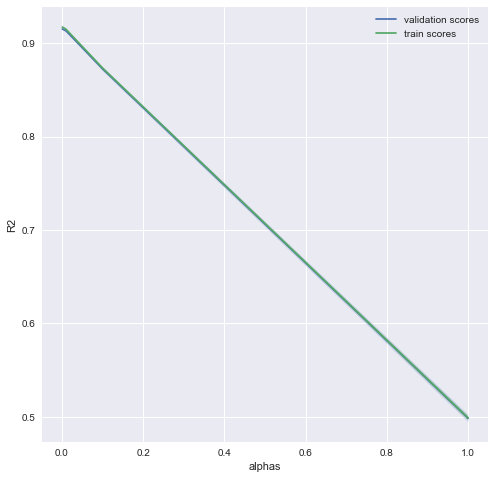

In [84]:
#Посмотрим, что у нас получилось на кросс-валидации для Lasso.
plt.figure(figsize=(8, 8))
test_results = np.array([cvLasso.cv_results_['split0_test_score'],cvLasso.cv_results_['split1_test_score'],
                     cvLasso.cv_results_['split2_test_score']]).T;
train_results = np.array([cvLasso.cv_results_['split0_train_score'],cvLasso.cv_results_['split1_train_score'],
                      cvLasso.cv_results_['split2_train_score']]).T;
plot_with_err([0.001, 0.01, 0.1, 1], test_results, label='validation scores')
plot_with_err([0.001, 0.01, 0.1, 1], train_results, label='train scores')
plt.xlabel('alphas'); plt.ylabel('R2')
plt.legend()

Качество падает линейно с ростом коэффициента регуляризации. Регрессия очень не стабильна.

In [65]:

steps = [('scalar', StandardScaler()),
         ('RandomForestRegressor', RandomForestRegressor(random_state=17))]
pipeline = Pipeline(steps)
parameters = {'RandomForestRegressor__n_estimators': [50, 100, 150],
             'RandomForestRegressor__max_depth' : [15, 20, 25]}

cvRf = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cvRf.fit(X_train,y_train)
print("Accuracy: {}".format(cvRf.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(cvRf.best_params_))

Accuracy: 0.9247536746648548
Tuned Model Parameters: {'RandomForestRegressor__max_depth': 20, 'RandomForestRegressor__n_estimators': 150}


Внимание: при  n_estimators более 250 (однажды выставил такое значение) - Считалось около 3.5 часов. 
Случайный лес с повышением при увеличение числа деревьев и максимальной глубины, наращивает качество, но становится очень медленным и начинает проигрывать по скорости регрессии очень сильно. Вообще я запускал перебор только 2 раза, а признаки добавлял новые гораздо чаще, так что при запуске score будет отличным от текущего.

In [79]:
cvRf.cv_results_

{'mean_fit_time': array([146.54822143, 283.83751925, 427.76161615, 162.79016232,
        322.17162347, 482.72863579, 166.49261848, 329.14748971,
        493.91736126]),
 'mean_score_time': array([0.84687042, 0.88381092, 0.94061852, 0.84354544, 0.91513197,
        0.98316884, 0.84956813, 0.92165128, 0.99521057]),
 'mean_test_score': array([0.91794632, 0.91928574, 0.91946044, 0.91821001, 0.91959634,
        0.91972044, 0.9179403 , 0.91946592, 0.91962185]),
 'mean_train_score': array([0.98223614, 0.98281575, 0.9830287 , 0.98773919, 0.98824002,
        0.98842317, 0.98817286, 0.98868193, 0.98885283]),
 'param_RandomForestRegressor__max_depth': masked_array(data=[15, 15, 15, 20, 20, 20, 25, 25, 25],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_RandomForestRegressor__n_estimators': masked_array(data=[50, 100, 150, 50, 100, 150, 50, 100, 150],
              mask=[False, False

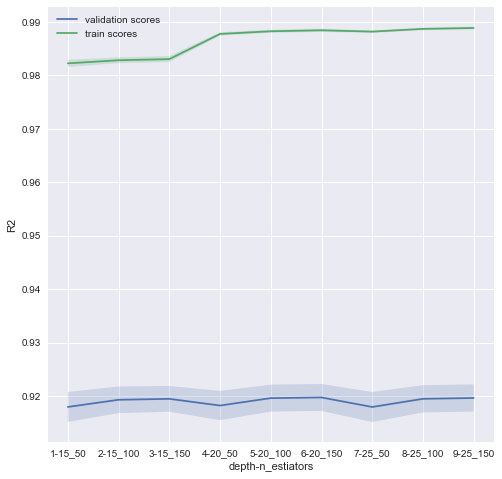

In [83]:
#Посмотрим, что у нас получилось на кросс-валидации для RandomForest.
plt.figure(figsize=(8, 8))
test_results = np.array([cvRf.cv_results_['split0_test_score'],cvRf.cv_results_['split1_test_score'],
                     cvRf.cv_results_['split2_test_score']]).T;
train_results = np.array([cvRf.cv_results_['split0_train_score'],cvRf.cv_results_['split1_train_score'],
                      cvRf.cv_results_['split2_train_score']]).T;
plot_with_err(['1-15_50', '2-15_100', '3-15_150', '4-20_50', '5-20_100', '6-20_150',
               '7-25_50', '8-25_100', '9-25_150'], test_results, label='validation scores')
plot_with_err(['1-15_50', '2-15_100', '3-15_150', '4-20_50', '5-20_100', '6-20_150',
               '7-25_50', '8-25_100', '9-25_150'], train_results, label='train scores')
plt.xlabel('depth-n_estiators'); plt.ylabel('R2')
plt.legend()

RandomForest намного стабильнее Lasso, причем уже при n_estimators = 100 и глубине = 15 уже дает отличный результат

In [66]:

steps = [('scalar', StandardScaler()),
         ('lgb.LGBMRegressor', lgb.LGBMRegressor(random_state=17))]
pipeline = Pipeline(steps)
parameters = {'lgb.LGBMRegressor__n_estimators': [700, 800,900],
             'lgb.LGBMRegressor__max_depth' : [3, 4, 5],
             'lgb.LGBMRegressor__learning_rate' : [0.03, 0.06, 0.09]}

cvLgb = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cvLgb.fit(X_train,y_train)
print("Accuracy: {}".format(cvLgb.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(cvLgb.best_params_))

Accuracy: 0.9345514456204569
Tuned Model Parameters: {'lgb.LGBMRegressor__learning_rate': 0.06, 'lgb.LGBMRegressor__max_depth': 4, 'lgb.LGBMRegressor__n_estimators': 800}


In [85]:
cvLgb.cv_results_

{'mean_fit_time': array([ 66.26989261,  72.32290284,  79.83600775,  76.65070717,
         85.35216165,  93.80098557,  88.77353462,  98.29962722,
        108.11929321,  64.35316912,  71.40666882,  78.56786005,
         74.49167919,  82.1462578 ,  90.76861072,  85.15962489,
         95.06428504, 105.29228854,  64.61052767,  72.01473626,
         78.91718403,  75.56278714,  82.30282299,  90.27434937,
         83.83503413,  94.27372909, 102.80097644]),
 'mean_score_time': array([1.54489207, 1.52236207, 1.57589483, 1.54755902, 1.59010323,
        1.67008503, 1.6107293 , 1.64181344, 1.66881951, 1.4903268 ,
        1.52968836, 1.54494564, 1.53522444, 1.57058922, 1.60389296,
        1.61319176, 1.63625558, 1.67790802, 1.59116864, 1.53198338,
        1.55583978, 1.59435964, 1.58653927, 1.62534579, 1.60986614,
        1.64134614, 1.67841236]),
 'mean_test_score': array([0.92260873, 0.92403238, 0.92507206, 0.92734604, 0.92791218,
        0.92831695, 0.92882063, 0.92907842, 0.92923469, 0.92764273,

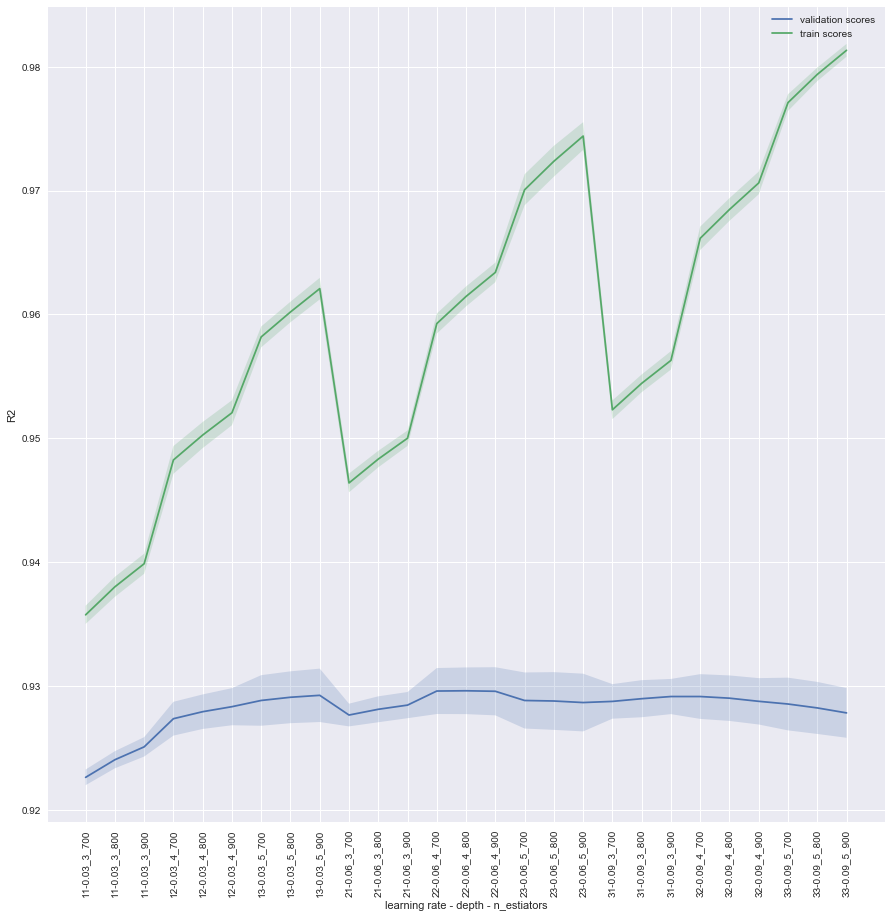

In [88]:
#Посмотрим, что у нас получилось на кросс-валидации для lgb.
plt.figure(figsize=(15, 15))
test_results = np.array([cvLgb.cv_results_['split0_test_score'],cvLgb.cv_results_['split1_test_score'],
                     cvLgb.cv_results_['split2_test_score']]).T;
train_results = np.array([cvLgb.cv_results_['split0_train_score'],cvLgb.cv_results_['split1_train_score'],
                      cvLgb.cv_results_['split2_train_score']]).T;
plot_with_err(['11-0.03_3_700', '11-0.03_3_800', '11-0.03_3_900', '12-0.03_4_700', '12-0.03_4_800', '12-0.03_4_900',
               '13-0.03_5_700', '13-0.03_5_800', '13-0.03_5_900', '21-0.06_3_700', '21-0.06_3_800', '21-0.06_3_900', 
               '22-0.06_4_700', '22-0.06_4_800', '22-0.06_4_900','23-0.06_5_700', '23-0.06_5_800', '23-0.06_5_900',
               '31-0.09_3_700', '31-0.09_3_800', '31-0.09_3_900', '32-0.09_4_700', '32-0.09_4_800', '32-0.09_4_900',
               '33-0.09_5_700', '33-0.09_5_800', '33-0.09_5_900'], test_results, label='validation scores')
plot_with_err(['11-0.03_3_700', '11-0.03_3_800', '11-0.03_3_900', '12-0.03_4_700', '12-0.03_4_800', '12-0.03_4_900',
               '13-0.03_5_700', '13-0.03_5_800', '13-0.03_5_900', '21-0.06_3_700', '21-0.06_3_800', '21-0.06_3_900', 
               '22-0.06_4_700', '22-0.06_4_800', '22-0.06_4_900','23-0.06_5_700', '23-0.06_5_800', '23-0.06_5_900',
               '31-0.09_3_700', '31-0.09_3_800', '31-0.09_3_900', '32-0.09_4_700', '32-0.09_4_800', '32-0.09_4_900',
               '33-0.09_5_700', '33-0.09_5_800', '33-0.09_5_900'], train_results, label='train scores')
plt.xlabel('learning rate - depth - n_estiators'); plt.ylabel('R2')
plt.xticks(rotation= 90)
plt.legend()

#### Посмотрим на результаты метрик алгоритмов с лучшими параметрами

In [89]:
%%time

clf = RandomForestRegressor(random_state=17)
rf_base = Pipeline([('scalar', scalar), ('RandomForestRegressor', clf)])
rf_base.set_params(RandomForestRegressor__n_estimators=150, RandomForestRegressor__max_depth=15).fit(X_train, y_train)
                     
y_pred = lgb_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(rf_base.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.9243381113079071, RMSLE: 0.13241201622086599
Wall time: 11min 11s


Неплохо, но по времени он протигрывает lgb

In [98]:
%%time

clf = lgb.LGBMRegressor(random_state=17)
lgb_base = Pipeline([('scalar', scalar), ('lgb', clf)])
lgb_base.set_params(lgb__learning_rate=0.06, lgb__n_estimators=900, lgb__max_depth=4).fit(X_train, y_train)
                     
y_pred = lgb_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(lgb_base.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.9347084739508015, RMSLE: 0.13765995334788764
Wall time: 2min 27s


Лучший результат и отличное время

In [99]:
%%time

clf = Lasso(random_state=17)
lasso_base = Pipeline([('scalar', scalar), ('Lasso', clf)])
lasso_base.set_params(Lasso__alpha=0.001).fit(X_train, y_train)
                     
y_pred = lasso_base.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(lasso_base.score(X_test, y_test), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

R2_score: 0.9182705750541275, RMSLE: 0.1535043459678629
Wall time: 1min 13s


Правда, я не очень верю в стабильность регрессии с alpha = 0.001 - скорее всего на отложенной выборке такая регуляризация будет пагубно влиять на результат, если отложенные данные имеют хоть немного отличное статистическое распределение.

### Ну и финальная проба - стеккинг и блендинг
Воспользуемся авторской реализацие стеккинга и блендинга от Александра Дьяконова отсюда:

https://github.com/Dyakonov/ml_hacks/blob/master/dj_stacking.ipynb

Отличная статья на эту же тему от Александра Дьяконова:

https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending/

In [60]:
# Класс для стеккинга и блендинга 
class DjStacking(BaseEstimator, ClassifierMixin):  
    """Стэкинг моделей scikit-learn"""

    def __init__(self, models, ens_model):
        """
        Инициализация
        models - базовые модели для стекинга
        ens_model - мета-модель
        """
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None
        
    def fit(self, X, y=None, p=0.25, cv=3, err=0.001, random_state=17):
        """
        Обучение стекинга
        p - в каком отношении делить на обучение / тест
            если p = 0 - используем всё обучение!
        cv  (при p=0) - сколько фолдов использовать
        err (при p=0) - величина случайной добавки к метапризнакам
        random_state - инициализация генератора
            
        """
        if (p > 0): # делим на обучение и тест
            # разбиение на обучение моделей и метамодели
            train, valid, y_train, y_valid = train_test_split(X, y, test_size=p, random_state=random_state)
            
            # заполнение матрицы для обучения метамодели
            self.valid = np.zeros((valid.shape[0], self.n))
            for t, clf in enumerate(self.models):
                clf.fit(train, y_train)
                self.valid[:, t] = clf.predict(valid)
                
            # обучение метамодели
            self.ens_model.fit(self.valid, y_valid)
            
        else: # используем всё обучение
            
            # для регуляризации - берём случайные добавки
            self.valid = err*np.random.randn(X.shape[0], self.n)
            
            for t, clf in enumerate(self.models):
                # это oob-ответы алгоритмов
                self.valid[:, t] += cross_val_predict(clf, X, y, cv=cv, n_jobs=-1, method='predict')
                # но сам алгоритм надо настроить
                clf.fit(X, y)
            
            # обучение метамодели
            self.ens_model.fit(self.valid, y)  
            

        return self
    


    def predict(self, X, y=None):
        """
        Работа стэкинга
        """
        # заполение матрицы для мета-классификатора
        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)
        
        a = self.ens_model.predict(X_meta)
        
        return (a)

In [62]:
%%time
# Обучу различные модели с разными гиперпараметрами и посмотрю на их отдельные результаты. 

df_train = work_data.drop(['id','price', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)

las0 = Lasso(alpha=0.001)
las0.fit(X_train, y_train)
y_pred = las0.predict(X_test)
print("las0, R2_score: {}, RMSLE: {}".format(las0.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))
las1 = Lasso(alpha=0.1)
las1.fit(X_train, y_train)
y_pred = las1.predict(X_test)
print("las1, R2_score: {}, RMSLE: {}".format(las1.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

las2 = Lasso(alpha=0.01)
las2.fit(X_train, y_train)
y_pred = las2.predict(X_test)
print("las2, R2_score: {}, RMSLE: {}".format(las2.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

rf1 = RandomForestRegressor(n_estimators=50)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
print("rf1, R2_score: {}, RMSLE: {}".format(rf1.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))
rf2 = RandomForestRegressor(n_estimators=250, max_depth=20)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)
print("rf2, R2_score: {}, RMSLE: {}".format(rf2.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

gbm1 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.06, max_depth=4, n_estimators=900, nthread=-1, objective='regression')    
gbm1.fit(X_train, y_train)
y_pred = gbm1.predict(X_test)
print("gbm1, R2_score: {}, RMSLE: {}".format(gbm1.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

gbm2 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.05, max_depth=3, n_estimators=800, nthread=-1, objective='regression')    
gbm2.fit(X_train, y_train)
y_pred = gbm2.predict(X_test)
print("gbm2, R2_score: {}, RMSLE: {}".format(gbm2.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

gbm3 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.05, max_depth=5, n_estimators=1000, nthread=-1, objective='regression')    
gbm3.fit(X_train, y_train)
y_pred = gbm3.predict(X_test)
print("gbm3, R2_score: {}, RMSLE: {}".format(gbm3.score(X_test, y_test),
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

las0, R2_score: 0.9176397858648956, RMSLE: 0.15411406485987417
las1, R2_score: 0.8133905173834317, RMSLE: 0.22842537249578462
las2, R2_score: 0.8990893472429423, RMSLE: 0.1693654358529798
rf1, R2_score: 0.9219768556752521, RMSLE: 0.15005104706042596
rf2, R2_score: 0.9247026945833564, RMSLE: 0.14748242585746565
gbm1, R2_score: 0.9347575803102669, RMSLE: 0.13766519890281131
gbm2, R2_score: 0.9319138598183963, RMSLE: 0.1405041191633656
gbm3, R2_score: 0.9344011195025719, RMSLE: 0.13821773312351074
Wall time: 27min 55s


In [63]:
# Набор моделей, в качестве мета-алгоритма возьму Lasso регрессию.
models = [las2,las0, rf1, rf2, gbm1, gbm2, gbm3]
ens_model = Lasso(alpha = 0.1, random_state = 17)

In [64]:
# Запустим блендинг и стеккинг

s1 = DjStacking(models, ens_model)
s1.fit(X_train, y_train)
y_pred1=s1.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(r2_score(y_test, y_pred1), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred1,  lmbda_price))))




R2_score: 0.9337899051515417, RMSLE: 0.13860854087598234


In [65]:
s2 = DjStacking(models, ens_model)
s2.fit(X_train, y_train, p=-1)
y_pred2 = s2.predict(X_test)
print("R2_score: {}, RMSLE: {}".format(r2_score(y_test, y_pred2), 
                                       rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(y_pred2,  lmbda_price))))

R2_score: 0.9357729990299323, RMSLE: 0.13678492346784374


Стеккинг и блендинг не позволили улучшить качество модели. И в этом нет ничего не обычного, посокльку у нас среди моделей есть очень хорошая модель, которая дает очень высокий результат. Скорее всего улучшений можно было бы добиться больше "лучших" разннобразных моделей, которые в итоге бы дали небольшой прирост качства. Но, в целом, практическая польза от такого метода возможна, разве что, в соревнованиях, поскольку с ростом числа объектов в выборке и роста числа базовых тяжелых алгоритмов скорость работы будет еще больше увеличиваться относительно 1 алгоритма, например того же lgb. Еще, как вариант, можно исключать из стеккинга "тяжелые алгоритмы" и пробовать добиться высокого качества на простых, но польза от такого опять же только в соревнованиях. 

## Часть 8. Прогноз для отложенной выборки сравнение оптимальных параметров алгоритма победителя для тестовых и отложенных данных.

In [97]:
# Мержим дополнительные таблицы
validation_data = validation_data.merge(clinic, how='left', on='zipcode')
validation_data = validation_data.merge(shop_horeca, how='left', on ='zipcode')
validation_data = validation_data.merge(school, how='left', on ='zipcode')
validation_data = validation_data.merge(crime, how='left', on='zipcode')
validation_data = validation_data.fillna(0)

In [100]:
df_train = work_data.drop(['id','price', 'date'], axis=1)
df_test = validation_data.drop(['id','price', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.25, random_state=17)

In [ ]:
"""
Проверяем лучшую модель. Тренируем на всей work_data и предсказываем для validation_data
дополнительно немного переберем параметры, дабы понять насколько мы переобучаемся на тестовых данных,
когда настраивали гиперпараметры

"""

test_R2, holdout_R2, test_rmsle, holdout_rmsle  = [], [],[], []
n_estimator = [100,200,300,500,700,900]

for i in n_estimator:

    lgb_final = lgb.LGBMRegressor(max_depth=4, lgb__learning_rate=0.06, n_estimators=i)   
    
    lgb_final.fit(X_train, y_train)
    test_R2.append(r2_score(y_test, lgb_final.predict(X_test)))
    test_rmsle.append(rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(lgb_final.predict(X_test),  lmbda_price)))    
    holdout_R2.append(r2_score(target_val, lgb_final.predict(df_test)))
    holdout_rmsle.append(rmsle(inv_boxcox(target_val,   lmbda_price), inv_boxcox(lgb_final.predict(df_test),  lmbda_price)))

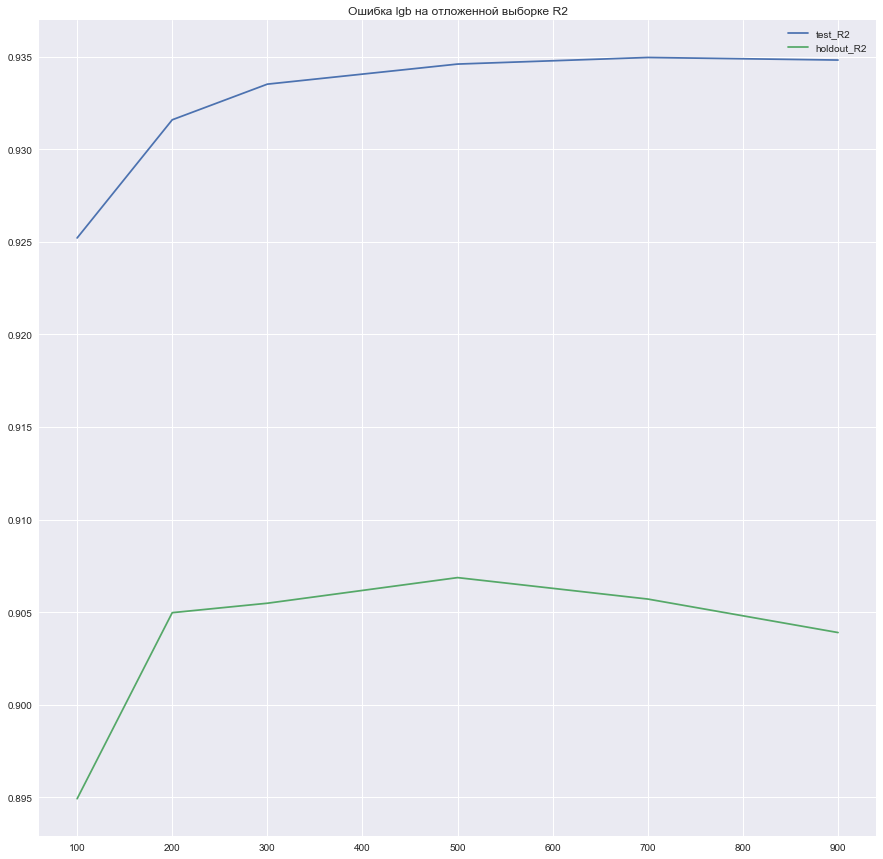

In [108]:
plt.figure(figsize=(15, 15))    
plt.plot(n_estimator, test_R2, label='test_R2')
plt.plot(n_estimator, holdout_R2, label='holdout_R2')
plt.title('Ошибка lgb на отложенной выборке R2')
plt.legend();

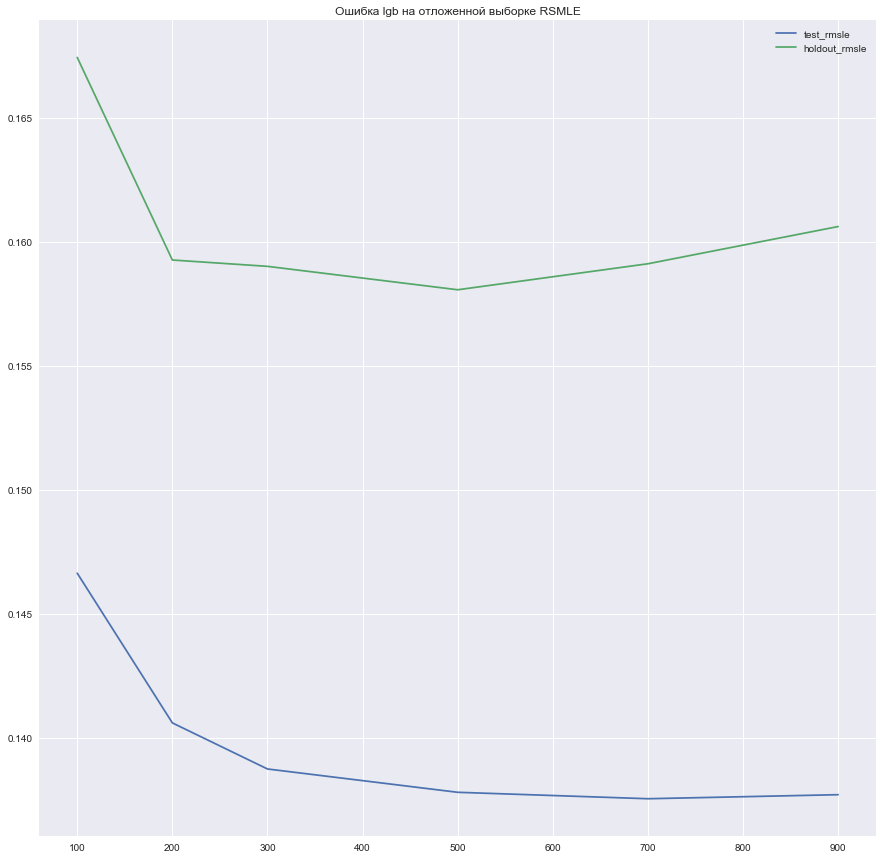

In [109]:
plt.figure(figsize=(15, 15)) 
plt.plot(n_estimator, test_rmsle, label='test_rmsle')
plt.plot(n_estimator, holdout_rmsle, label='holdout_rmsle')
plt.title('Ошибка lgb на отложенной выборке RSMLE')
plt.legend();

In [110]:
# Теперь посмотрим на качество при изменении глубины

test_R2, holdout_R2, test_rmsle, holdout_rmsle  = [], [],[], []
n_estimator = [1,2,3,4,5,6]

for i in n_estimator:

    lgb_final = lgb.LGBMRegressor(max_depth=i, lgb__learning_rate=0.06, n_estimators=500)   
    
    lgb_final.fit(X_train, y_train)
    test_R2.append(r2_score(y_test, lgb_final.predict(X_test)))
    test_rmsle.append(rmsle(inv_boxcox(y_test,   lmbda_price), inv_boxcox(lgb_final.predict(X_test),  lmbda_price)))    
    holdout_R2.append(r2_score(target_val, lgb_final.predict(df_test)))
    holdout_rmsle.append(rmsle(inv_boxcox(target_val,   lmbda_price), inv_boxcox(lgb_final.predict(df_test),  lmbda_price)))

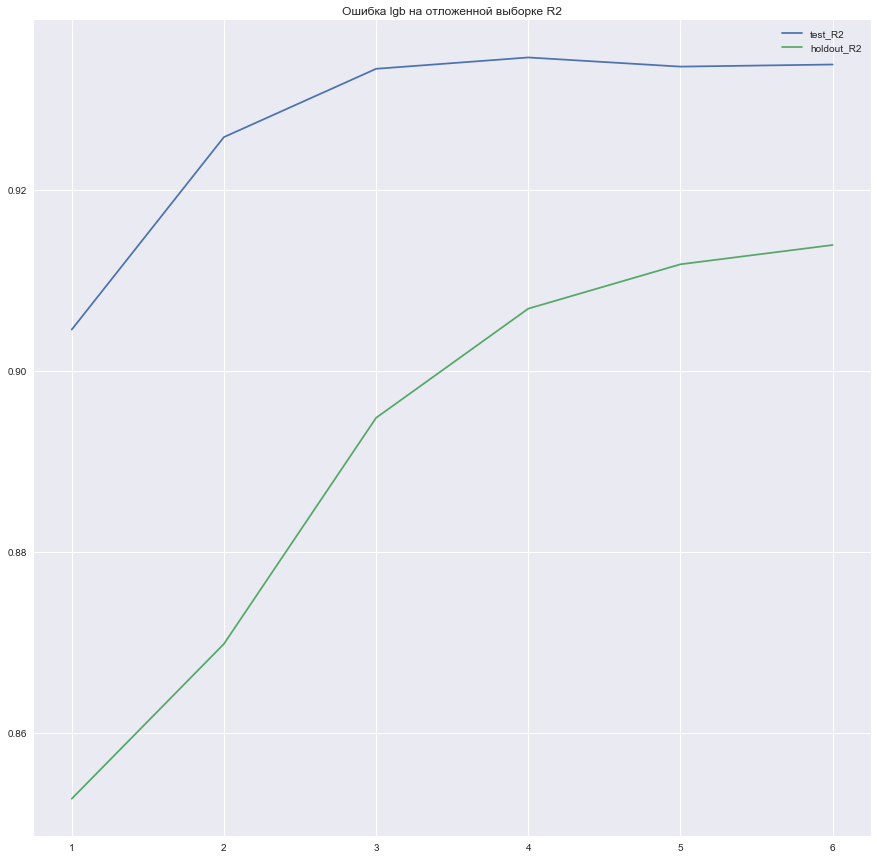

In [111]:
plt.figure(figsize=(15, 15))    
plt.plot(n_estimator, test_R2, label='test_R2')
plt.plot(n_estimator, holdout_R2, label='holdout_R2')
plt.title('Ошибка lgb на отложенной выборке R2')
plt.legend();



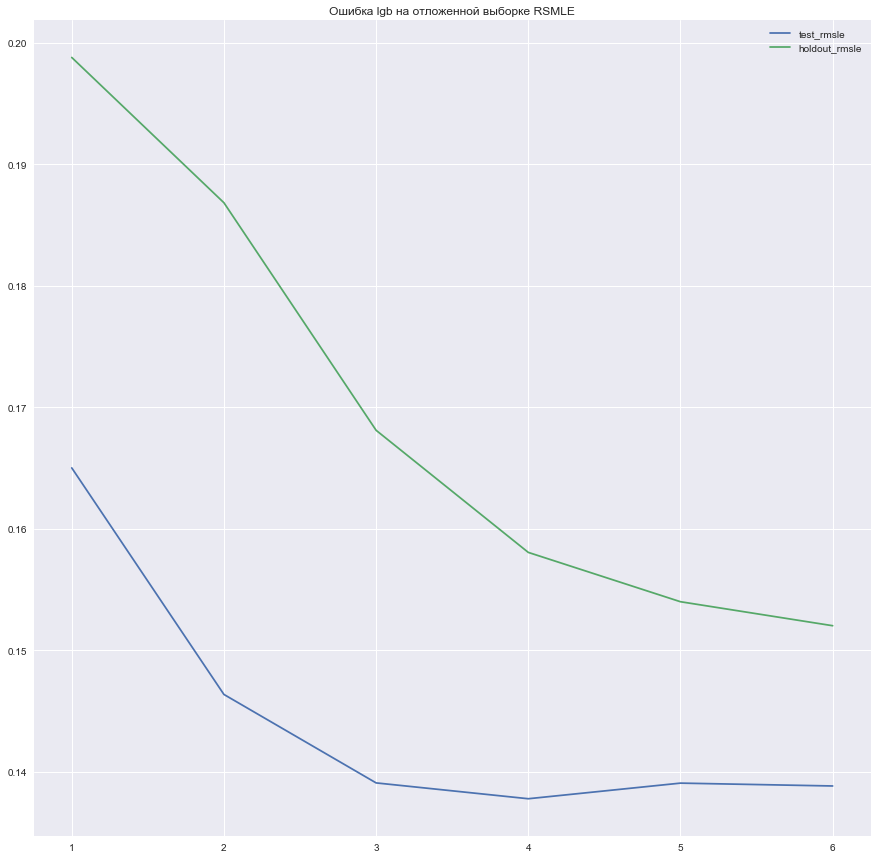

In [112]:
plt.figure(figsize=(15, 15)) 
plt.plot(n_estimator, test_rmsle, label='test_rmsle')
plt.plot(n_estimator, holdout_rmsle, label='holdout_rmsle')
plt.title('Ошибка lgb на отложенной выборке RSMLE')
plt.legend();

In [116]:
gbm_win = lgb.LGBMRegressor(learning_rate=0.06, max_depth=7, n_estimators=500, random_state=17)    
gbm_win.fit(X_train, y_train)
y_pred = gbm_win.predict(df_test)
print("gbm_win, R2_score: {}, RMSLE: {}".format(gbm_win.score(df_test, target_val),
                                       rmsle(inv_boxcox(target_val,   lmbda_price), inv_boxcox(y_pred,  lmbda_price))))

gbm_win, R2_score: 0.9168339280480744, RMSLE: 0.14923617757619653


## Часть 9. Итоговый вывод.

1. Вцелом за счет преобразования признаков и таргета, а также за счет добавления новых признаков, плюс за счет подбора гиперпараметров модели мне удалось улучшить коэффициент детерминации R2 на 8% и уменьшить среднеквадратичную логарифмическую ошибку почти на 0.06 единиц на тестовой выборке. 
2. Лучшим алгоритмом обучения по параметру качество - скорость - стабильность стал lightgbm
3.  Для lgb качество на валидации немного ниже чем на тесте, но тоже достаточно высокое. Регрессия сильно переобучается и очень не стабиль уже на тестовой валидации. 
4. Лучшее качество на тестовой выбрке (R2_score: 0.9347084739508015, RMSLE: 0.13765995334788764) с параметрами lr=0.06, md=4, n_es=900, на отложенной(R2_score: 0.9168339280480744, RMSLE: 0.14923617757619653) с параметрами lr=0.06, md=7, n_es=500. Расходжение очень небольшое, что говорит, что lgb очень хорошо себя показал в плане обобщающей способности. 
5. Точки роста качества мне видятся в поиске новых признаков для данного региона по каждой возможной локации, таких как: средний доход хозяйства, процент жилья сдаваемого в аренду, средняя стоимость проживания, удаленность от административных центоров основных городов, наличие экологических и парковых зон рядом с объектами недвижимости. 